# Chapter 18: Computational Modeling

*Mathematics for Psychologists and Computation*

Welcome to Chapter 18, where we'll explore computational modeling - a powerful approach that allows psychologists to formalize theories, simulate behavior, and test hypotheses about psychological processes. Computational models bridge the gap between mathematical theory and empirical data, providing insights that might be difficult to obtain through traditional experimental methods alone.

In this chapter, we'll build on the mathematical foundations established in previous chapters, particularly differential equations, to develop and analyze computational models relevant to psychological research.

## 1. Introduction to Computational Modeling in Psychology

Computational modeling involves creating formal, mathematical representations of psychological processes that can be implemented as computer programs. These models allow researchers to:

1. **Formalize Theories**: Transform verbal theories into precise mathematical statements
2. **Generate Predictions**: Derive specific, testable predictions from theoretical principles
3. **Simulate Behavior**: Run simulations to observe how a system might behave under various conditions
4. **Test Hypotheses**: Compare model predictions with empirical data to evaluate theories
5. **Discover Mechanisms**: Identify potential underlying mechanisms that explain observed behavior

Let's start by importing the libraries we'll need throughout this chapter:

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, optimize, integrate

# Set plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 1.1 Types of Computational Models in Psychology

Computational models in psychology come in various forms, each suited to different research questions and levels of analysis:

1. **Mathematical Models**: Formal equations that describe relationships between variables
2. **Process Models**: Step-by-step algorithms that simulate cognitive processes
3. **Connectionist Models**: Neural network-based models that learn from experience
4. **Bayesian Models**: Probabilistic models based on Bayesian inference principles
5. **Dynamical Systems Models**: Models that capture how systems change over time
6. **Agent-Based Models**: Simulations of interactions between autonomous agents

In this chapter, we'll focus primarily on mathematical and dynamical systems models, building on the differential equations we explored in Chapter 17.

### 1.2 The Modeling Cycle

Computational modeling typically follows an iterative cycle:

1. **Formulate the Model**: Define the mathematical structure based on theoretical assumptions
2. **Implement the Model**: Translate the mathematics into computer code
3. **Simulate Behavior**: Run the model to generate predictions
4. **Compare with Data**: Evaluate how well the model matches empirical observations
5. **Refine the Model**: Adjust parameters or structure to improve fit

This cycle continues until the model adequately captures the phenomenon of interest or until its limitations become clear.

## 2. Building Simple Computational Models

Let's start with some simple but powerful models that are widely used in psychological research.

### 2.1 Modeling Learning: The Rescorla-Wagner Model

The Rescorla-Wagner model is a classic model of associative learning that describes how organisms learn associations between stimuli. The core equation is:

$$\Delta V = \alpha \beta (\lambda - V)$$

Where:
- $\Delta V$ is the change in associative strength
- $\alpha$ is the learning rate for the conditioned stimulus (CS)
- $\beta$ is the learning rate for the unconditioned stimulus (US)
- $\lambda$ is the maximum possible associative strength
- $V$ is the current associative strength

Let's implement this model to simulate a simple conditioning experiment:

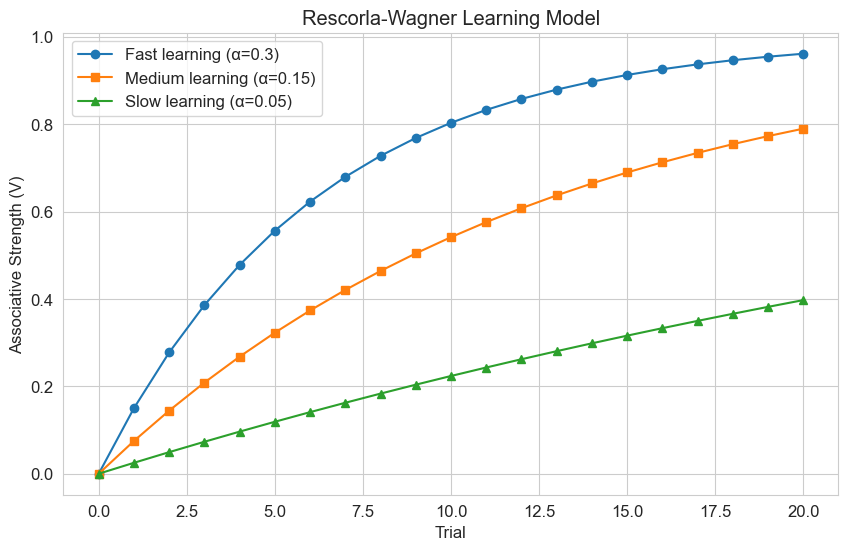

In [80]:
def rescorla_wagner(alpha, beta, lambda_max, initial_v, trials):
    """Simulate learning using the Rescorla-Wagner model.
    
    Parameters:
    -----------
    alpha : float
        Learning rate for the conditioned stimulus (0-1)
    beta : float
        Learning rate for the unconditioned stimulus (0-1)
    lambda_max : float
        Maximum associative strength
    initial_v : float
        Initial associative strength
    trials : int
        Number of learning trials to simulate
        
    Returns:
    --------
    v_values : array
        Associative strength after each trial
    """
    v_values = np.zeros(trials + 1)
    v_values[0] = initial_v
    
    for t in range(trials):
        delta_v = alpha * beta * (lambda_max - v_values[t])
        v_values[t + 1] = v_values[t] + delta_v
        
    return v_values

# Simulate learning with different parameters
trials = 20
v_fast = rescorla_wagner(alpha=0.3, beta=0.5, lambda_max=1.0, initial_v=0.0, trials=trials)
v_medium = rescorla_wagner(alpha=0.15, beta=0.5, lambda_max=1.0, initial_v=0.0, trials=trials)
v_slow = rescorla_wagner(alpha=0.05, beta=0.5, lambda_max=1.0, initial_v=0.0, trials=trials)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(trials + 1), v_fast, 'o-', label='Fast learning (α=0.3)')
plt.plot(range(trials + 1), v_medium, 's-', label='Medium learning (α=0.15)')
plt.plot(range(trials + 1), v_slow, '^-', label='Slow learning (α=0.05)')
plt.xlabel('Trial')
plt.ylabel('Associative Strength (V)')
plt.title('Rescorla-Wagner Learning Model')
plt.legend()
plt.grid(True)
plt.show()

The Rescorla-Wagner model demonstrates several important principles of learning:

1. Learning is fastest at the beginning and slows as the associative strength approaches its maximum
2. The learning rate parameters (α and β) control how quickly associations form
3. Learning follows a negatively accelerated curve, similar to many empirical learning curves

This simple model has been remarkably successful in explaining various phenomena in classical conditioning, including acquisition, extinction, blocking, and overshadowing.

### 2.2 Modeling Decision Making: Drift Diffusion Model

The Drift Diffusion Model (DDM) is a popular model of decision making that describes how people make choices between two alternatives. The model assumes that evidence accumulates over time until it reaches a decision threshold.

The basic DDM can be described by the stochastic differential equation:

$$dx = v \cdot dt + s \cdot dW$$

Where:
- $x$ is the accumulated evidence
- $v$ is the drift rate (average rate of evidence accumulation)
- $s$ is the noise coefficient
- $dW$ is a Wiener process (random noise)

Let's implement a simple version of this model:

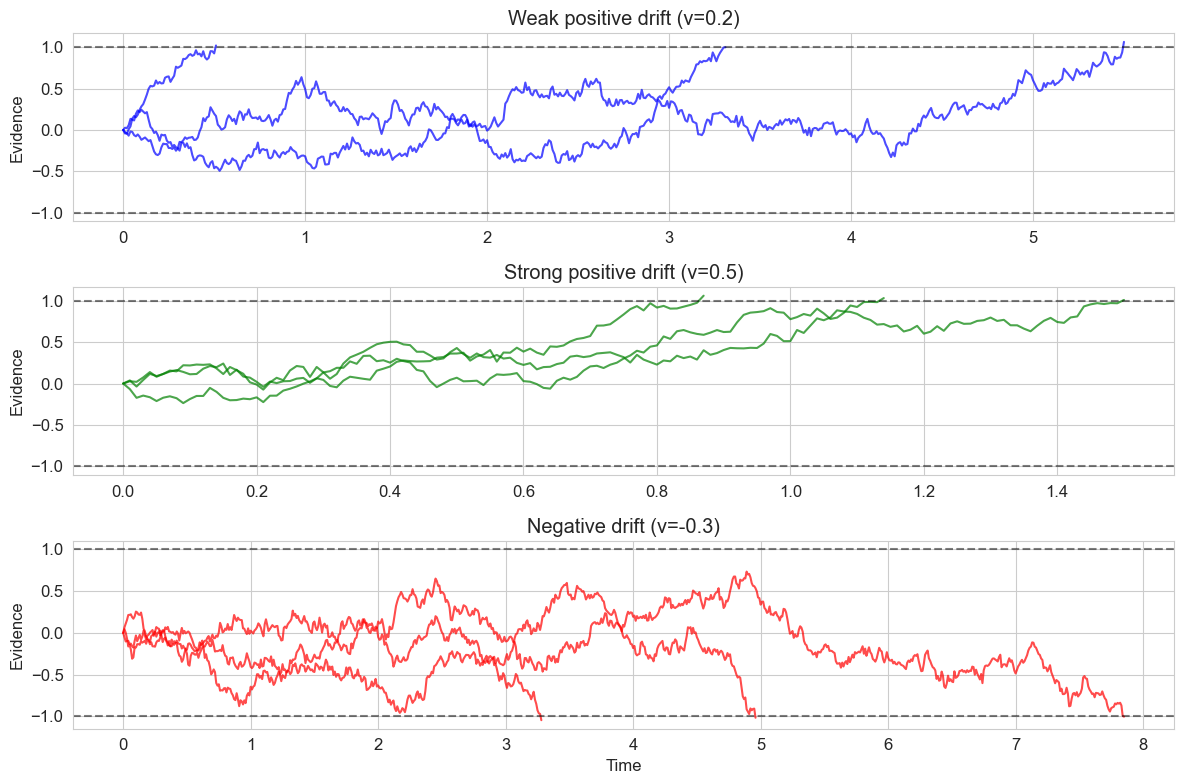

In [81]:
def drift_diffusion_trial(drift_rate, threshold, noise_sd, max_time=10.0, dt=0.01):
    """Simulate a single trial of the drift diffusion model.
    
    Parameters:
    -----------
    drift_rate : float
        Rate of evidence accumulation
    threshold : float
        Decision threshold (positive value)
    noise_sd : float
        Standard deviation of the noise
    max_time : float
        Maximum simulation time
    dt : float
        Time step for simulation
        
    Returns:
    --------
    decision : int
        1 for upper threshold, -1 for lower threshold, 0 for no decision
    rt : float
        Reaction time (time to reach threshold)
    evidence : array
        Evidence values at each time step
    times : array
        Time points
    """
    # Initialize
    times = np.arange(0, max_time, dt)
    n_steps = len(times)
    evidence = np.zeros(n_steps)
    
    # Simulate evidence accumulation
    for i in range(1, n_steps):
        # Add drift and noise
        evidence[i] = evidence[i-1] + drift_rate * dt + noise_sd * np.sqrt(dt) * np.random.normal()
        
        # Check if threshold is reached
        if evidence[i] >= threshold:
            return 1, times[i], evidence[:i+1], times[:i+1]  # Upper threshold
        elif evidence[i] <= -threshold:
            return -1, times[i], evidence[:i+1], times[:i+1]  # Lower threshold
    
    # No decision reached within max_time
    return 0, max_time, evidence, times

# Run multiple trials with different drift rates
np.random.seed(42)  # For reproducibility
threshold = 1.0
noise_sd = 0.5

# Simulate trials with different drift rates
drift_rates = [0.2, 0.5, -0.3]  # Positive favors upper threshold, negative favors lower
labels = ['Weak positive drift', 'Strong positive drift', 'Negative drift']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 8))

for i, (drift, label, color) in enumerate(zip(drift_rates, labels, colors)):
    # Run 3 example trials for each drift rate
    for j in range(3):
        decision, rt, evidence, times = drift_diffusion_trial(drift, threshold, noise_sd)
        
        # Plot with slight offset for visibility
        plt.subplot(3, 1, i+1)
        plt.plot(times, evidence, alpha=0.7, color=color)
        
    # Add threshold lines and labels
    plt.axhline(y=threshold, linestyle='--', color='black', alpha=0.5)
    plt.axhline(y=-threshold, linestyle='--', color='black', alpha=0.5)
    plt.title(f'{label} (v={drift})')
    plt.ylabel('Evidence')
    
    # Only add x-label to bottom plot
    if i == 2:
        plt.xlabel('Time')

plt.tight_layout()
plt.show()

Now let's simulate many trials to see the distribution of reaction times and choices:

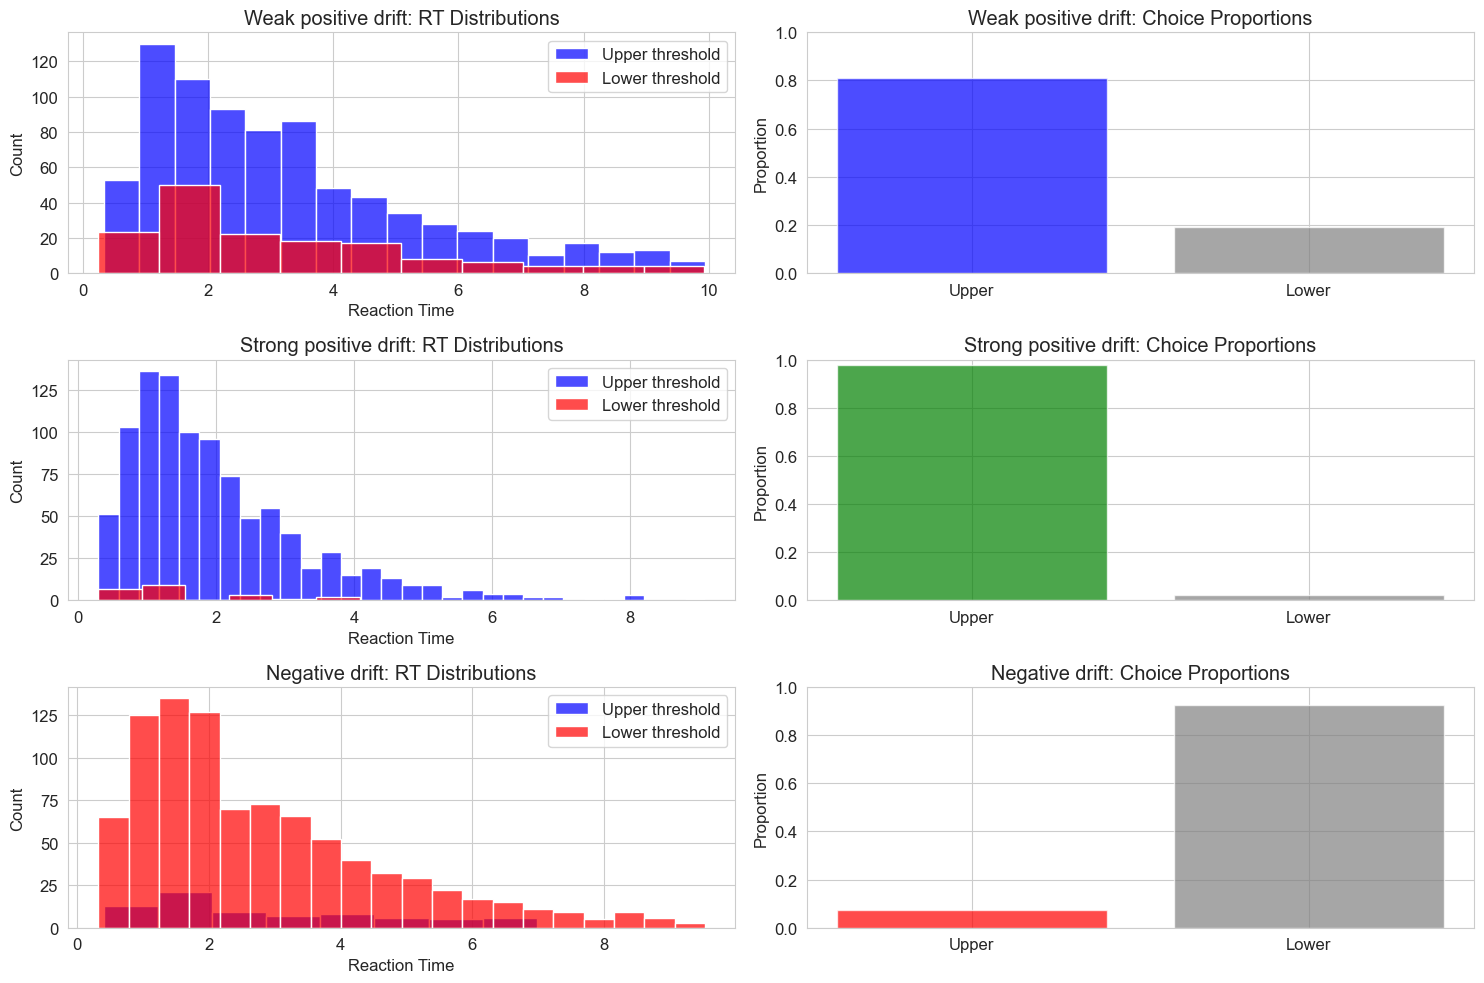

In [82]:
def run_ddm_experiment(drift_rate, threshold, noise_sd, n_trials=1000):
    """Run multiple trials of the drift diffusion model."""
    decisions = np.zeros(n_trials)
    rts = np.zeros(n_trials)
    
    for i in range(n_trials):
        decision, rt, _, _ = drift_diffusion_trial(drift_rate, threshold, noise_sd)
        decisions[i] = decision
        rts[i] = rt
    
    return decisions, rts

# Run experiments with different drift rates
np.random.seed(42)
n_trials = 1000
threshold = 1.0
noise_sd = 0.5

drift_rates = [0.2, 0.5, -0.3]
labels = ['Weak positive drift', 'Strong positive drift', 'Negative drift']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(15, 10))

for i, (drift, label, color) in enumerate(zip(drift_rates, labels, colors)):
    decisions, rts = run_ddm_experiment(drift, threshold, noise_sd, n_trials)
    
    # Calculate proportion of upper threshold choices
    prop_upper = np.sum(decisions == 1) / n_trials
    
    # Separate RTs by decision
    upper_rts = rts[decisions == 1]
    lower_rts = rts[decisions == -1]
    
    # Plot RT distributions
    plt.subplot(3, 2, 2*i+1)
    if len(upper_rts) > 0:
        sns.histplot(upper_rts, color='blue', alpha=0.7, label='Upper threshold')
    if len(lower_rts) > 0:
        sns.histplot(lower_rts, color='red', alpha=0.7, label='Lower threshold')
    plt.title(f'{label}: RT Distributions')
    plt.xlabel('Reaction Time')
    plt.ylabel('Count')
    plt.legend()
    
    # Plot choice proportions
    plt.subplot(3, 2, 2*i+2)
    plt.bar(['Upper', 'Lower'], [prop_upper, 1-prop_upper], color=[color, 'gray'], alpha=0.7)
    plt.title(f'{label}: Choice Proportions')
    plt.ylabel('Proportion')
    plt.ylim(0, 1)
    
plt.tight_layout()
plt.show()

The Drift Diffusion Model demonstrates several important principles of decision making:

1. **Speed-Accuracy Tradeoff**: Higher thresholds lead to more accurate but slower decisions
2. **Evidence Quality**: Stronger drift rates (better evidence) lead to faster and more accurate decisions
3. **RT Distributions**: The model naturally produces right-skewed reaction time distributions similar to those observed in empirical data
4. **Error RTs**: The model can explain why error responses are sometimes faster or slower than correct responses

The DDM has been successfully applied to a wide range of decision-making tasks, from simple perceptual decisions to more complex value-based choices.

## 3. Dynamical Systems Models in Psychology

Building on our work with differential equations in Chapter 17, let's explore how dynamical systems models can be applied to psychological phenomena.

### 3.1 Modeling Emotion Dynamics

Emotions fluctuate over time and can be influenced by various factors, including external events and internal regulation processes. A simple dynamical model of emotion might include:

1. A baseline emotional state
2. A tendency to return to baseline (homeostasis)
3. External influences (events)
4. Random fluctuations

We can model this using a stochastic differential equation:

$$\frac{dx}{dt} = -\alpha(x - b) + I(t) + \sigma\eta(t)$$

Where:
- $x$ is the emotional state
- $b$ is the baseline state
- $\alpha$ is the rate of return to baseline
- $I(t)$ represents external influences
- $\sigma\eta(t)$ represents random fluctuations

Let's implement this model:

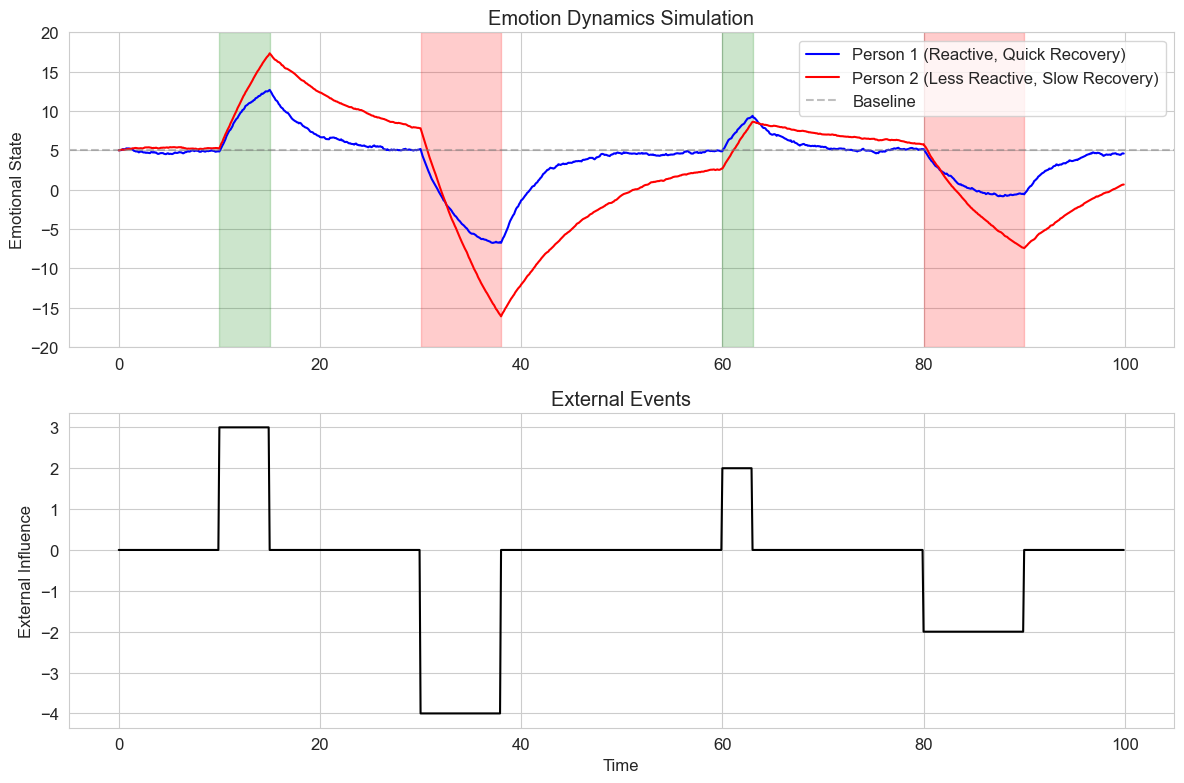

In [83]:
def emotion_dynamics(alpha, baseline, external_events, noise_level, initial_state, duration, dt=0.1):
    """Simulate emotion dynamics using a simple dynamical model.
    
    Parameters:
    -----------
    alpha : float
        Rate of return to baseline
    baseline : float
        Baseline emotional state
    external_events : list of tuples
        Each tuple contains (time, magnitude, duration) of an external event
    noise_level : float
        Standard deviation of random fluctuations
    initial_state : float
        Initial emotional state
    duration : float
        Total duration to simulate
    dt : float
        Time step for simulation
        
    Returns:
    --------
    times : array
        Time points
    states : array
        Emotional states at each time point
    events : array
        External influence at each time point
    """
    # Initialize
    times = np.arange(0, duration, dt)
    n_steps = len(times)
    states = np.zeros(n_steps)
    events = np.zeros(n_steps)
    states[0] = initial_state
    
    # Add external events
    for event_time, magnitude, event_duration in external_events:
        event_start = int(event_time / dt)
        event_end = int((event_time + event_duration) / dt)
        if event_end >= n_steps:
            event_end = n_steps - 1
        events[event_start:event_end] += magnitude
    
    # Simulate emotion dynamics
    for i in range(1, n_steps):
        # Calculate change in emotional state
        homeostasis = -alpha * (states[i-1] - baseline)
        external = events[i-1]
        noise = noise_level * np.random.normal()
        
        # Update state
        delta_x = (homeostasis + external) * dt + noise * np.sqrt(dt)
        states[i] = states[i-1] + delta_x
    
    return times, states, events

# Define parameters for two individuals with different emotion dynamics
np.random.seed(42)
duration = 100  # time units

# Person 1: Highly reactive, quick recovery
alpha1 = 0.3  # Fast return to baseline
baseline1 = 5  # Neutral baseline (on a 0-10 scale)
noise1 = 0.2  # Moderate random fluctuations

# Person 2: Less reactive, slow recovery
alpha2 = 0.1  # Slow return to baseline
baseline2 = 5  # Same baseline
noise2 = 0.1  # Less random fluctuations

# Define some emotional events (time, magnitude, duration)
events = [
    (10, 3, 5),    # Positive event at t=10, magnitude 3, duration 5
    (30, -4, 8),   # Negative event at t=30, magnitude -4, duration 8
    (60, 2, 3),    # Small positive event at t=60
    (80, -2, 10)   # Moderate negative event at t=80
]

# Simulate emotion dynamics for both individuals
times1, states1, events1 = emotion_dynamics(alpha1, baseline1, events, noise1, baseline1, duration)
times2, states2, events2 = emotion_dynamics(alpha2, baseline2, events, noise2, baseline2, duration)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot emotional states
plt.subplot(2, 1, 1)
plt.plot(times1, states1, 'b-', label='Person 1 (Reactive, Quick Recovery)')
plt.plot(times2, states2, 'r-', label='Person 2 (Less Reactive, Slow Recovery)')
plt.axhline(y=baseline1, color='gray', linestyle='--', alpha=0.5, label='Baseline')

# Highlight event periods
for event_time, magnitude, event_duration in events:
    color = 'green' if magnitude > 0 else 'red'
    plt.axvspan(event_time, event_time + event_duration, alpha=0.2, color=color)

plt.ylabel('Emotional State')
plt.title('Emotion Dynamics Simulation')
plt.legend()
plt.ylim(-20, 20)

# Plot external events
plt.subplot(2, 1, 2)
plt.plot(times1, events1, 'k-')
plt.xlabel('Time')
plt.ylabel('External Influence')
plt.title('External Events')

plt.tight_layout()
plt.show()

This simple model captures several important aspects of emotional dynamics:

1. **Individual Differences**: People differ in their emotional reactivity and recovery rates
2. **Homeostasis**: Emotions tend to return to a baseline state over time
3. **External Influences**: Events can push emotions away from baseline
4. **Stochasticity**: Emotions fluctuate randomly even in the absence of major events

More complex models might include additional factors such as emotion regulation strategies, interactions between different emotions, or the influence of cognitive appraisals.

### 3.2 Modeling Cognitive Dynamics: Attractor Networks

Attractor networks are dynamical systems models that can represent how cognitive states evolve over time. These models are particularly useful for understanding phenomena like bistable perception, decision making, and memory retrieval.

A simple attractor model can be represented by a potential function with multiple minima (attractors). The system's state evolves by moving downhill on this potential landscape.

Mathematical Foundation of Attractor Networks
The dynamics of attractor networks can be formalized using differential equations. The general form is:

$$\frac{dx}{dt} = -\nabla V(x) + \eta(t)$$

Where:

- $x$ represents the state of the system (e.g., neural activity or perceptual state)
- $V(x)$ is the potential function with multiple local minima (attractors)
- $\nabla V(x)$ is the gradient of the potential function
- $\eta(t)$ represents noise or random fluctuations
The negative gradient $-\nabla V(x)$ ensures that the system moves "downhill" on the potential landscape, eventually settling into one of the local minima (attractors) unless perturbed by noise.

For a one-dimensional system, this simplifies to:

$$\frac{dx}{dt} = -\frac{dV(x)}{dx} + \eta(t)$$
 Double-Well Potential Model
A classic example is the double-well potential, which can model bistable perception (where perception alternates between two interpretations of an ambiguous stimulus). The potential function can be defined as:

$$V(x) = \frac{1}{4}x^4 - \frac{1}{2}x^2 + \lambda x$$

Where:

- $x$ is the perceptual state
- The quartic term $\frac{1}{4}x^4$ ensures stability (prevents the state from growing infinitely)
- The quadratic term $-\frac{1}{2}x^2$ creates two wells (attractors)
- $\lambda x$ is a bias term that can make one attractor deeper than the other
The corresponding dynamics equation is:

$$\frac{dx}{dt} = -\frac{dV(x)}{dx} + \eta(t) = -(x^3 - x + \lambda) + \eta(t)$$

When $\lambda = 0$ and without noise, this system has two stable fixed points at $x = \pm 1$ (the attractors) and an unstable fixed point at $x = 0$ (the barrier between attractors).
 Hopfield Networks
A more complex attractor network model is the Hopfield network, which can be used to model associative memory. The energy function (analogous to the potential function) for a Hopfield network is:

$$E = -\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}w_{ij}s_i s_j - \sum_{i=1}^{N}h_i s_i$$

Where:

- $s_i$ is the state of neuron $i$ (typically +1 or -1)
- $w_{ij}$ is the connection weight between neurons $i$ and $j$
- $h_i$ is an external input to neuron $i$
The dynamics of the network follow:

$$\frac{ds_i}{dt} = -\frac{\partial E}{\partial s_i} = \sum_{j=1}^{N}w_{ij}s_j + h_i$$

In the discrete-time version, neurons update according to:

$$s_i(t+1) = \text{sign}\left(\sum_{j=1}^{N}w_{ij}s_j(t) + h_i\right)$$

The connection weights are typically set using the Hebbian learning rule:

$$w_{ij} = \frac{1}{N}\sum_{\mu=1}^{p}\xi_i^{\mu}\xi_j^{\mu}$$

Where $\xi_i^{\mu}$ is the state of neuron $i$ in stored pattern $\mu$, and $p$ is the number of stored patterns.
 Continuous Attractor Networks
Continuous attractor networks extend these ideas to represent continuous variables like spatial position or head direction. The energy landscape has a continuous manifold of attractors rather than discrete points.

The dynamics can be described by:

$$\tau\frac{dr_i}{dt} = -r_i + f\left(\sum_{j=1}^{N}w_{ij}r_j + I_i\right)$$

Where:

- $r_i$ is the firing rate of neuron $i$
- $\tau$ is a time constant
- $f$ is a nonlinear activation function
- $w_{ij}$ are connection weights (typically a function of distance between neurons in the represented space)
- $I_i$ is external input
Let's implement a double-well potential model that could represent bistable perception:

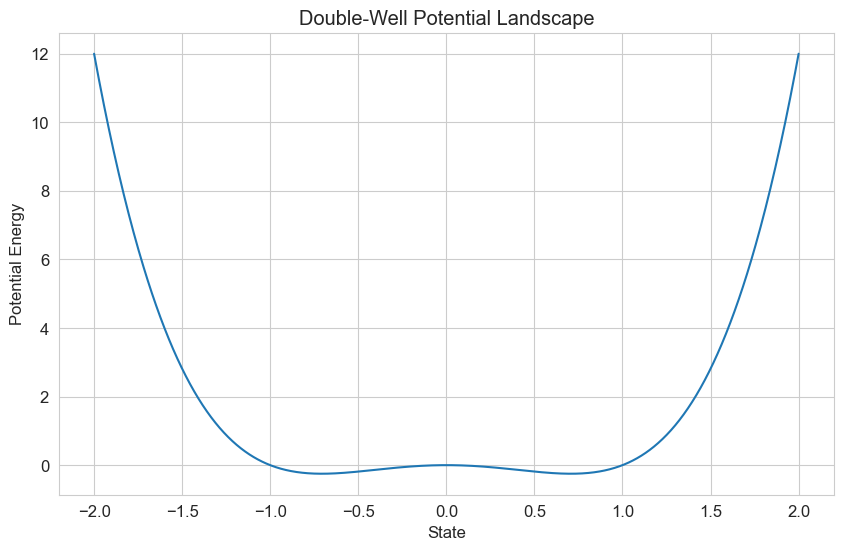

In [84]:
def double_well_potential(x, a=1, b=1):
    """Double-well potential function: V(x) = a*x^4 - b*x^2"""
    return a * x**4 - b * x**2

def force_from_potential(x, a=1, b=1):
    """Force is negative gradient of potential: F(x) = -dV/dx"""
    return -4 * a * x**3 + 2 * b * x

def simulate_attractor_dynamics(initial_state, noise_level, duration, dt=0.01, a=1, b=1):
    """Simulate dynamics in a double-well attractor."""
    times = np.arange(0, duration, dt)
    n_steps = len(times)
    states = np.zeros(n_steps)
    states[0] = initial_state
    
    for i in range(1, n_steps):
        # Calculate force and add noise
        force = force_from_potential(states[i-1], a, b)
        noise = noise_level * np.random.normal()
        
        # Update state
        states[i] = states[i-1] + force * dt + noise * np.sqrt(dt)
    
    return times, states

# Plot the potential landscape
x = np.linspace(-2, 2, 1000)
potential = double_well_potential(x)

plt.figure(figsize=(10, 6))
plt.plot(x, potential)
plt.title('Double-Well Potential Landscape')
plt.xlabel('State')
plt.ylabel('Potential Energy')
plt.show()

The double-well potential landscape illustrates how a system can have two stable states (the bottoms of the wells) separated by an unstable equilibrium (the peak between them). This type of landscape is useful for modeling phenomena like bistable perception, attitude change, or categorical perception.

Now, let's simulate how a system might evolve in this landscape under different conditions:

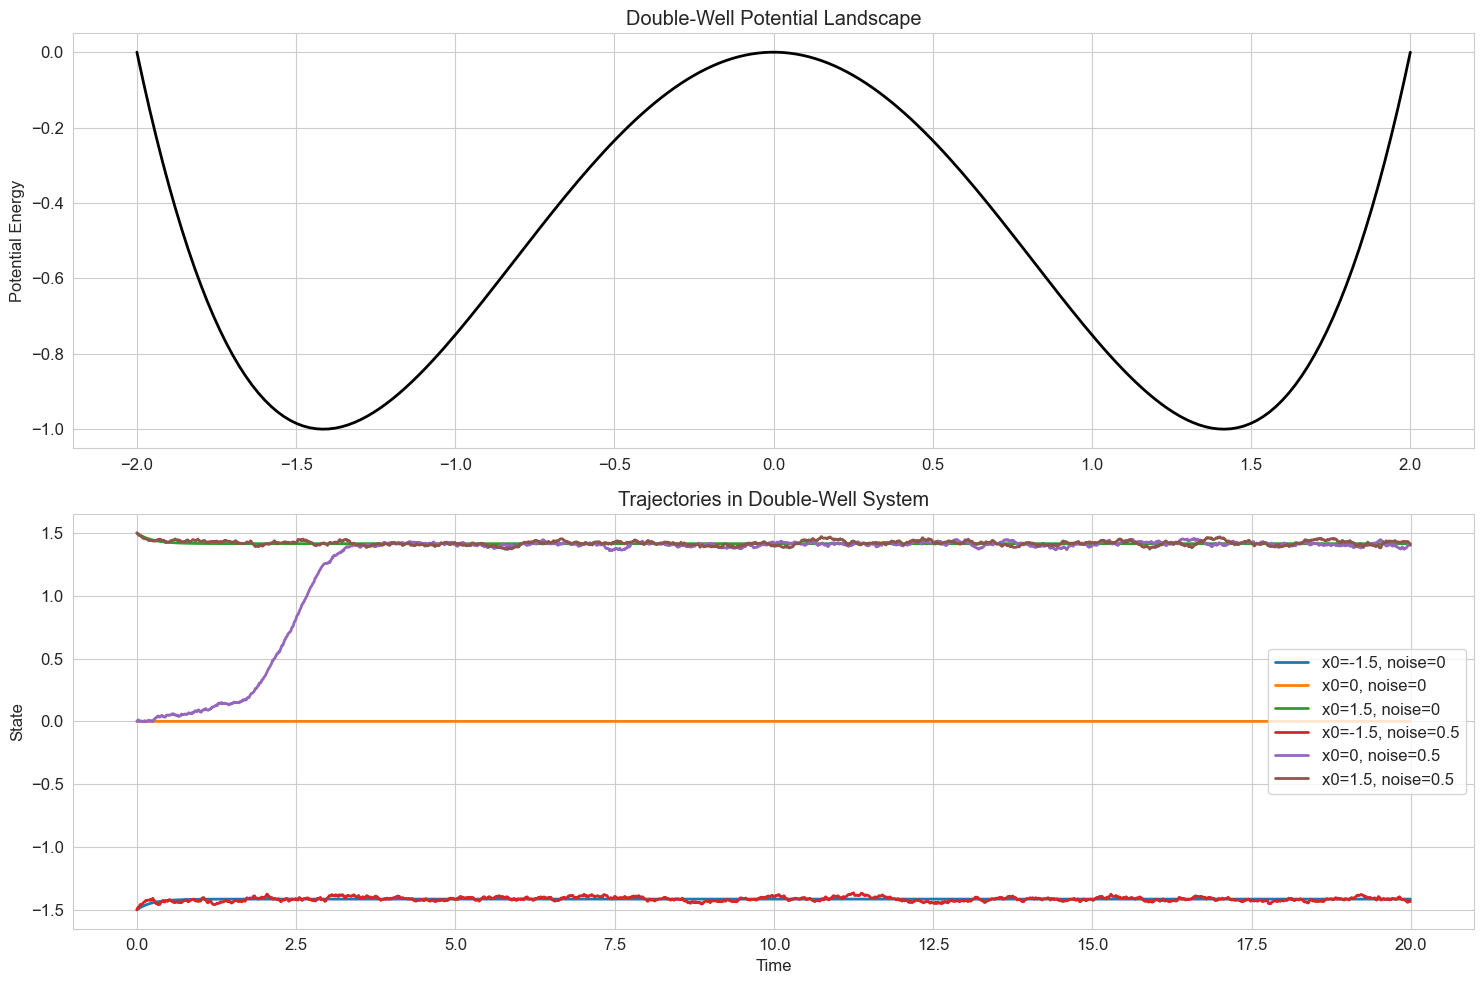

In [85]:
def double_well_dynamics(x, t, a, b, noise=0):
    """Dynamics for a particle in a double-well potential.
    
    The force is the negative gradient of the potential:
    F(x) = -dV/dx = -(-a*x + b*x^3) = a*x - b*x^3
    """
    return a*x - b*x**3 + noise*np.random.normal()

def simulate_double_well(x0, a, b, noise_level, duration, dt=0.01):
    """Simulate the dynamics of a particle in a double-well potential."""
    times = np.arange(0, duration, dt)
    n_steps = len(times)
    states = np.zeros(n_steps)
    states[0] = x0
    
    for i in range(1, n_steps):
        # Euler integration with noise
        states[i] = states[i-1] + double_well_dynamics(states[i-1], times[i-1], a, b, noise_level) * dt
    
    return times, states

# Parameters
a = 2.0
b = 1.0
duration = 20.0

# Simulate with different initial conditions and noise levels
x0_values = [-1.5, 0, 1.5]  # Left well, middle, right well
noise_levels = [0, 0.5]  # No noise, moderate noise

plt.figure(figsize=(15, 10))

# Plot the potential landscape for reference
plt.subplot(2, 1, 1)
x = np.linspace(-2, 2, 200)
potential = -0.5*a*x**2 + 0.25*b*x**4
plt.plot(x, potential, 'k-', linewidth=2)
plt.title('Double-Well Potential Landscape')
plt.ylabel('Potential Energy')
plt.grid(True)

# Plot trajectories
plt.subplot(2, 1, 2)

for noise in noise_levels:
    for x0 in x0_values:
        times, states = simulate_double_well(x0, a, b, noise, duration)
        label = f'x0={x0}, noise={noise}'
        plt.plot(times, states, label=label, linewidth=2)

plt.title('Trajectories in Double-Well System')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The simulation demonstrates several important properties of dynamical systems with multiple stable states:

1. **Stability**: Initial conditions near a stable state tend to stay in that state's basin of attraction
2. **Instability**: Initial conditions at unstable equilibria (like the middle of the potential) are highly sensitive to small perturbations
3. **Noise Effects**: Sufficient noise can cause transitions between stable states, with transition probability depending on the barrier height

These properties are relevant to many psychological phenomena, such as:

- **Bistable Perception**: How we switch between alternative interpretations of ambiguous stimuli
- **Attitude Change**: How attitudes can remain stable but occasionally shift dramatically
- **Decision Making**: How preferences can flip between options under uncertainty

Let's explore one more example of how noise can induce transitions between stable states:

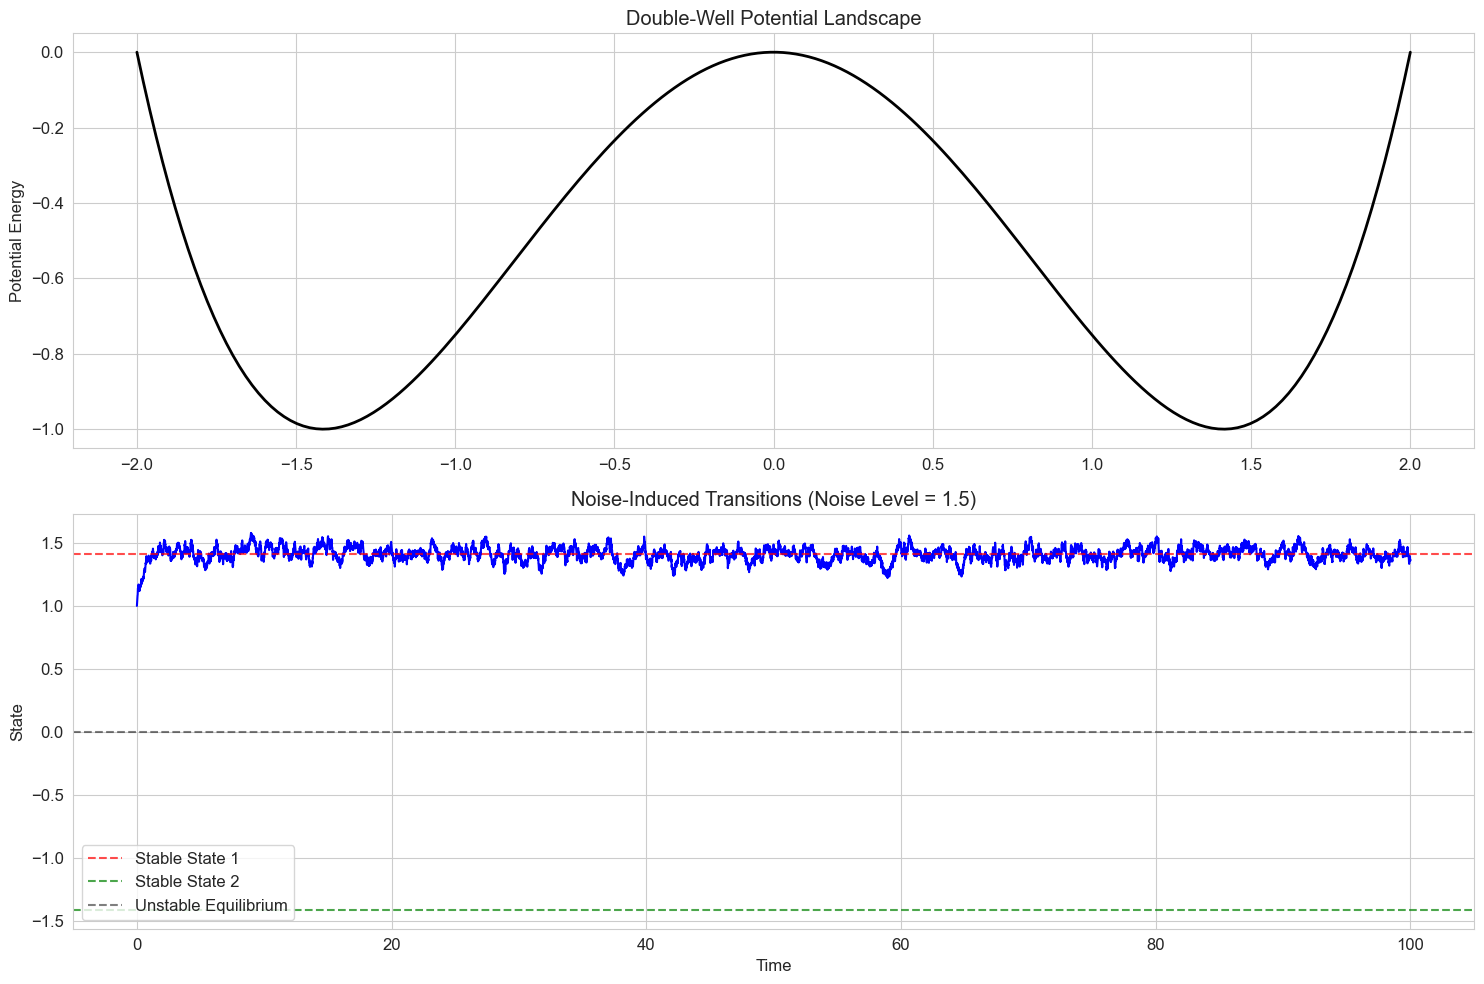

Number of transitions from state 1 to state 2: 0
Number of transitions from state 2 to state 1: 0


In [86]:
# Simulate with higher noise to observe transitions
np.random.seed(42)  # For reproducibility
duration = 100.0
high_noise = 1.5

times, states = simulate_double_well(1.0, a, b, high_noise, duration)

plt.figure(figsize=(15, 10))

# Plot the potential landscape
plt.subplot(2, 1, 1)
x = np.linspace(-2, 2, 200)
potential = -0.5*a*x**2 + 0.25*b*x**4
plt.plot(x, potential, 'k-', linewidth=2)
plt.title('Double-Well Potential Landscape')
plt.ylabel('Potential Energy')
plt.grid(True)

# Plot the noisy trajectory
plt.subplot(2, 1, 2)
plt.plot(times, states, 'b-', linewidth=1.5)
plt.axhline(y=np.sqrt(a/b), color='r', linestyle='--', alpha=0.7, label='Stable State 1')
plt.axhline(y=-np.sqrt(a/b), color='g', linestyle='--', alpha=0.7, label='Stable State 2')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5, label='Unstable Equilibrium')
plt.title(f'Noise-Induced Transitions (Noise Level = {high_noise})')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate transition statistics
stable_state1 = np.sqrt(a/b)
stable_state2 = -np.sqrt(a/b)
threshold = 0  # Use the unstable equilibrium as threshold

# Identify transitions
in_state1 = states > threshold
transitions = np.diff(in_state1.astype(int))
transitions_1to2 = np.where(transitions == -1)[0]
transitions_2to1 = np.where(transitions == 1)[0]

print(f"Number of transitions from state 1 to state 2: {len(transitions_1to2)}")
print(f"Number of transitions from state 2 to state 1: {len(transitions_2to1)}")

# Calculate average dwell times
if len(transitions_1to2) > 0 and len(transitions_2to1) > 0:
    dwell_times1 = np.diff(np.concatenate(([0], transitions_1to2))) * dt
    dwell_times2 = np.diff(np.concatenate(([0], transitions_2to1))) * dt
    
    print(f"Average dwell time in state 1: {np.mean(dwell_times1):.2f} time units")
    print(f"Average dwell time in state 2: {np.mean(dwell_times2):.2f} time units")

This simulation demonstrates how noise can induce transitions between stable states, a phenomenon known as **stochastic resonance**. This concept has been applied to explain various psychological phenomena, including:

- **Perceptual Switching**: How we alternate between interpretations of ambiguous figures like the Necker cube
- **Attention Fluctuations**: How attention naturally oscillates between different foci
- **Mood Dynamics**: How mood can fluctuate between different states

The statistics of these transitions (frequency and dwell times) can provide insights into the underlying dynamics of the system.

## 4. Modeling Cognitive Processes

Let's now explore models of specific cognitive processes, focusing on memory and learning.

### 4.1 Memory Models: The ACT-R Activation Equation

The ACT-R cognitive architecture includes a mathematical model of memory retrieval based on activation. The activation of a memory item determines how quickly and accurately it can be retrieved.

The basic activation equation is:

$$A_i = B_i + \sum_j W_j S_{ji}$$

Where:
- $A_i$ is the activation of memory item $i$
- $B_i$ is the base-level activation, reflecting practice and decay
- $W_j$ is the attentional weight given to context element $j$
- $S_{ji}$ is the strength of association between context element $j$ and memory item $i$

The base-level activation is further defined as:

$$B_i = \ln\left(\sum_{k=1}^n t_k^{-d}\right)$$

Where:
- $t_k$ is the time since the $k$th practice of item $i$
- $d$ is the decay parameter (typically around 0.5)
- $n$ is the number of practices

Let's implement a simplified version of this model to simulate memory retrieval:

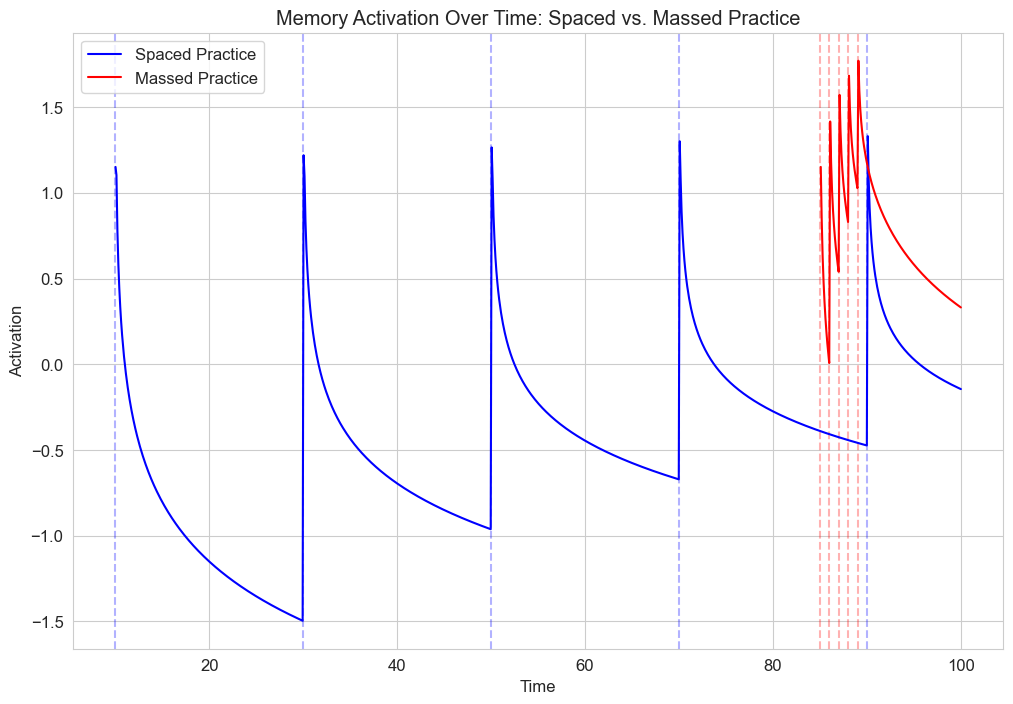

Spaced Practice: Retrieval Probability = 0.77, Retrieval Time = 0.23 s
Massed Practice: Retrieval Probability = 0.94, Retrieval Time = 0.14 s


In [87]:
def base_level_activation(practice_times, current_time, decay=0.5):
    """Calculate base-level activation according to ACT-R.
    
    Parameters:
    -----------
    practice_times : array
        Times when the item was practiced
    current_time : float
        Current time
    decay : float
        Decay parameter (default: 0.5)
        
    Returns:
    --------
    activation : float
        Base-level activation
    """
    # Calculate time since each practice
    time_since_practice = current_time - np.array(practice_times)
    
    # Ensure all times are positive (avoid division by zero)
    time_since_practice = np.maximum(time_since_practice, 0.1)
    
    # Calculate activation
    activation = np.log(np.sum(time_since_practice ** (-decay)))
    
    return activation

def retrieval_probability(activation, threshold, noise=0.3):
    """Calculate probability of successful retrieval.
    
    Parameters:
    -----------
    activation : float
        Memory activation
    threshold : float
        Retrieval threshold
    noise : float
        Activation noise parameter
        
    Returns:
    --------
    probability : float
        Probability of successful retrieval
    """
    # Logistic function to convert activation difference to probability
    return 1 / (1 + np.exp(-(activation - threshold) / noise))

def retrieval_time(activation, latency_factor=0.2):
    """Calculate retrieval time.
    
    Parameters:
    -----------
    activation : float
        Memory activation
    latency_factor : float
        Scaling factor for retrieval time
        
    Returns:
    --------
    time : float
        Retrieval time in seconds
    """
    return latency_factor * np.exp(-activation)

# Simulate memory practice and retrieval
# Let's create a spaced practice schedule and a massed practice schedule
current_time = 100  # Current time (arbitrary units)

# Spaced practice: 5 sessions spread out over time
spaced_practice = [10, 30, 50, 70, 90]  # Times of practice sessions

# Massed practice: 5 sessions close together
massed_practice = [85, 86, 87, 88, 89]  # Times of practice sessions

# Calculate activations over time
times = np.linspace(0, current_time, 1000)
spaced_activations = np.zeros_like(times)
massed_activations = np.zeros_like(times)

for i, t in enumerate(times):
    # Only include practices that happened before the current time
    spaced_valid = [p for p in spaced_practice if p <= t]
    massed_valid = [p for p in massed_practice if p <= t]
    
    if len(spaced_valid) > 0:
        spaced_activations[i] = base_level_activation(spaced_valid, t)
    else:
        spaced_activations[i] = float('-inf')  # No practice yet
        
    if len(massed_valid) > 0:
        massed_activations[i] = base_level_activation(massed_valid, t)
    else:
        massed_activations[i] = float('-inf')  # No practice yet

# Plot activations over time
plt.figure(figsize=(12, 8))

# Mark practice times
for p in spaced_practice:
    plt.axvline(x=p, color='blue', linestyle='--', alpha=0.3)
for p in massed_practice:
    plt.axvline(x=p, color='red', linestyle='--', alpha=0.3)

# Plot activations
valid_spaced = spaced_activations > float('-inf')
valid_massed = massed_activations > float('-inf')

plt.plot(times[valid_spaced], spaced_activations[valid_spaced], 'b-', label='Spaced Practice')
plt.plot(times[valid_massed], massed_activations[valid_massed], 'r-', label='Massed Practice')

plt.title('Memory Activation Over Time: Spaced vs. Massed Practice')
plt.xlabel('Time')
plt.ylabel('Activation')
plt.legend()
plt.grid(True)
plt.show()

# Calculate retrieval probabilities at the end
threshold = -0.5  # Retrieval threshold
spaced_prob = retrieval_probability(spaced_activations[-1], threshold)
massed_prob = retrieval_probability(massed_activations[-1], threshold)

spaced_time = retrieval_time(spaced_activations[-1])
massed_time = retrieval_time(massed_activations[-1])

print(f"Spaced Practice: Retrieval Probability = {spaced_prob:.2f}, Retrieval Time = {spaced_time:.2f} s")
print(f"Massed Practice: Retrieval Probability = {massed_prob:.2f}, Retrieval Time = {massed_time:.2f} s")

This model demonstrates the **spacing effect** in memory: spaced practice leads to better long-term retention than massed practice, even with the same number of practice sessions. The ACT-R activation equation provides a mathematical explanation for this effect through the power-law decay of memory traces.

The model also shows how activation affects both the probability of successful retrieval and the time required for retrieval, capturing two key aspects of memory performance.

### 4.2 Reinforcement Learning Models

Reinforcement learning (RL) models describe how agents learn from rewards and punishments to optimize their behavior. One of the simplest RL models is the Q-learning algorithm, which learns the expected value of actions in different states.

The core update equation for Q-learning is:

$$Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]$$

Where:
- $Q(s, a)$ is the expected value of taking action $a$ in state $s$
- $\alpha$ is the learning rate
- $r$ is the reward received
- $\gamma$ is the discount factor for future rewards
- $s'$ is the next state
- $\max_{a'} Q(s', a')$ is the maximum expected value in the next state

Let's implement a simple Q-learning model for a two-armed bandit task, where an agent must learn which of two options provides higher rewards:

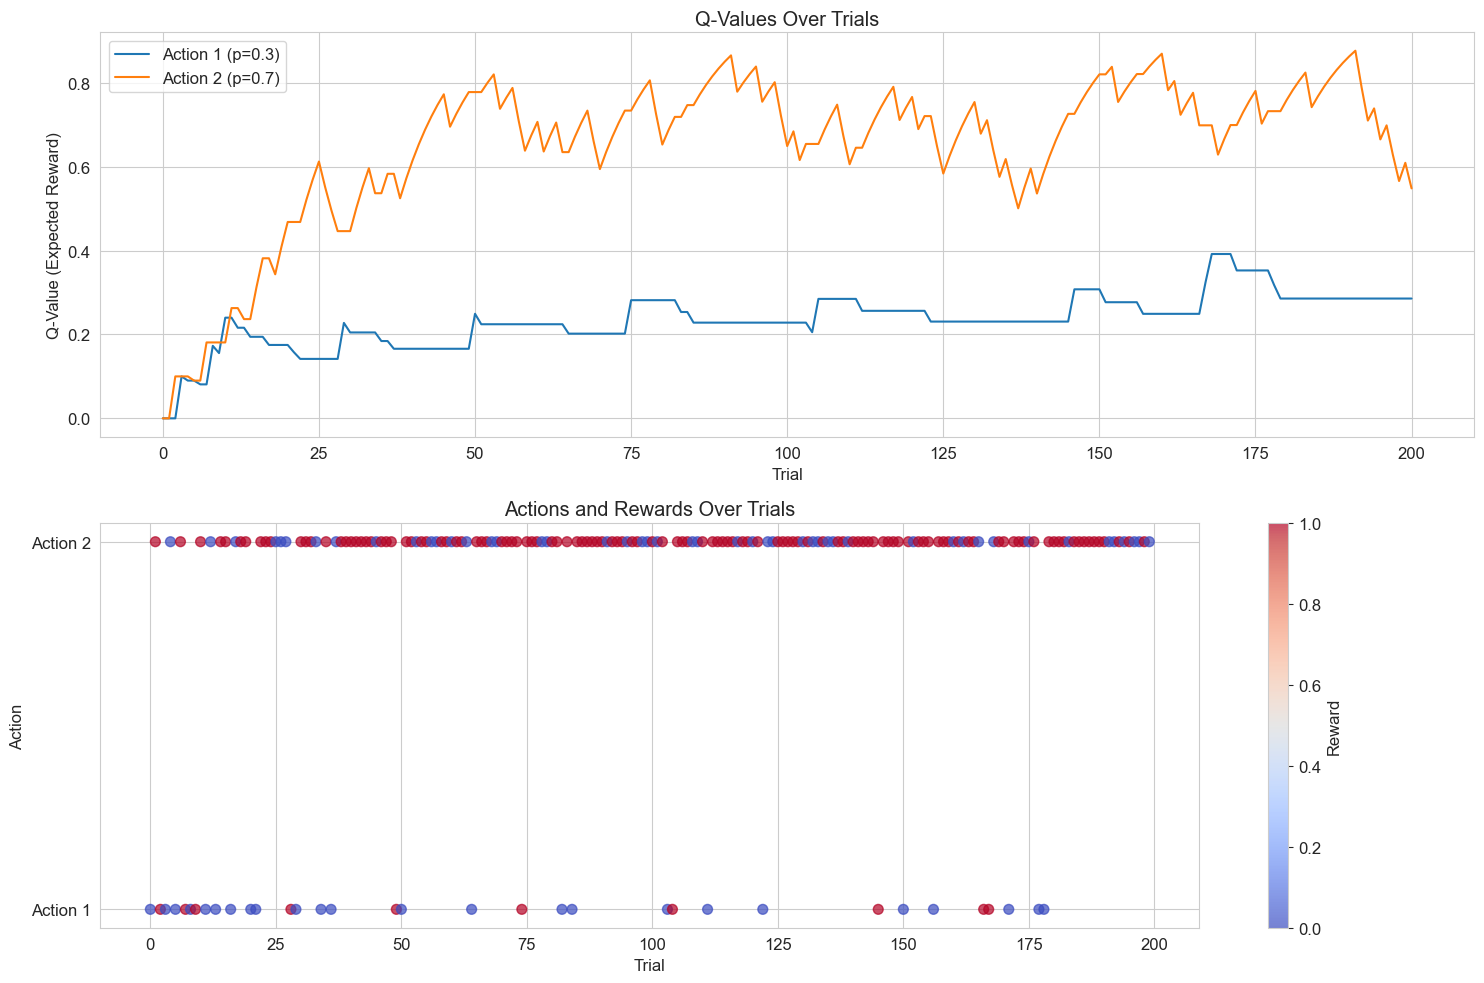

Overall optimal choice percentage: 83.0%
Final block optimal choice percentage: 100.0%


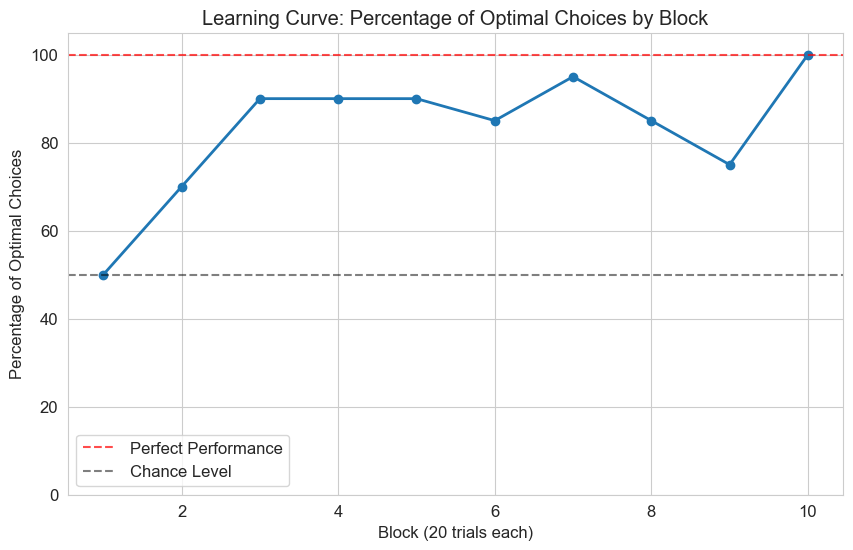

In [88]:
def q_learning_bandit(n_trials, alpha, temperature, reward_probs):
    """Simulate Q-learning in a multi-armed bandit task.
    
    Parameters:
    -----------
    n_trials : int
        Number of trials
    alpha : float
        Learning rate (0-1)
    temperature : float
        Temperature parameter for softmax action selection
    reward_probs : array
        Probability of reward for each action
        
    Returns:
    --------
    actions : array
        Actions chosen on each trial
    rewards : array
        Rewards received on each trial
    q_values : array
        Q-values for each action over trials
    """
    n_actions = len(reward_probs)
    
    # Initialize arrays to store results
    actions = np.zeros(n_trials, dtype=int)
    rewards = np.zeros(n_trials)
    q_values = np.zeros((n_trials + 1, n_actions))  # +1 to include initial values
    
    # Initialize Q-values to 0
    q_values[0] = np.zeros(n_actions)
    
    for t in range(n_trials):
        # Choose action using softmax policy
        action_probs = np.exp(q_values[t] / temperature)
        action_probs = action_probs / np.sum(action_probs)  # Normalize
        action = np.random.choice(n_actions, p=action_probs)
        actions[t] = action
        
        # Get reward (1 with probability reward_probs[action], 0 otherwise)
        reward = 1 if np.random.random() < reward_probs[action] else 0
        rewards[t] = reward
        
        # Update Q-values
        q_values[t+1] = q_values[t].copy()
        q_values[t+1, action] += alpha * (reward - q_values[t, action])
    
    return actions, rewards, q_values

# Run simulation
np.random.seed(42)
n_trials = 200
alpha = 0.1  # Learning rate
temperature = 0.2  # Lower values make action selection more deterministic
reward_probs = [0.3, 0.7]  # Action 1 has 30% reward probability, Action 2 has 70%

actions, rewards, q_values = q_learning_bandit(n_trials, alpha, temperature, reward_probs)

# Plot results
plt.figure(figsize=(15, 10))

# Plot Q-values over trials
plt.subplot(2, 1, 1)
for a in range(len(reward_probs)):
    plt.plot(range(n_trials + 1), q_values[:, a], label=f'Action {a+1} (p={reward_probs[a]})')
plt.title('Q-Values Over Trials')
plt.xlabel('Trial')
plt.ylabel('Q-Value (Expected Reward)')
plt.legend()
plt.grid(True)

# Plot action choices and rewards
plt.subplot(2, 1, 2)
plt.scatter(range(n_trials), actions, c=rewards, cmap='coolwarm', alpha=0.7, s=50)
plt.colorbar(label='Reward')
plt.title('Actions and Rewards Over Trials')
plt.xlabel('Trial')
plt.ylabel('Action')
plt.yticks([0, 1], ['Action 1', 'Action 2'])
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate performance statistics
optimal_action = np.argmax(reward_probs)
optimal_choices = np.sum(actions == optimal_action)
optimal_percentage = optimal_choices / n_trials * 100

# Calculate in blocks of 20 trials
block_size = 20
n_blocks = n_trials // block_size
block_optimal = np.zeros(n_blocks)

for b in range(n_blocks):
    start = b * block_size
    end = (b + 1) * block_size
    block_optimal[b] = np.mean(actions[start:end] == optimal_action) * 100

print(f"Overall optimal choice percentage: {optimal_percentage:.1f}%")
print(f"Final block optimal choice percentage: {block_optimal[-1]:.1f}%")

# Plot learning curve in blocks
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_blocks + 1), block_optimal, 'o-', linewidth=2)
plt.axhline(y=100, color='r', linestyle='--', alpha=0.7, label='Perfect Performance')
plt.axhline(y=50, color='k', linestyle='--', alpha=0.5, label='Chance Level')
plt.title('Learning Curve: Percentage of Optimal Choices by Block')
plt.xlabel('Block (20 trials each)')
plt.ylabel('Percentage of Optimal Choices')
plt.ylim(0, 105)
plt.legend()
plt.grid(True)
plt.show()

This Q-learning model demonstrates how an agent can learn to prefer the more rewarding option through trial and error. The model captures several important aspects of human learning:

1. **Exploration vs. Exploitation**: The temperature parameter controls the balance between trying different options (exploration) and choosing the option with the highest expected value (exploitation)
2. **Incremental Learning**: The learning rate determines how quickly the agent updates its expectations based on new information
3. **Value-Based Choice**: Actions are selected probabilistically based on their expected values

Reinforcement learning models have been widely applied to understand human and animal learning in various contexts, from simple conditioning to complex decision-making tasks.

## 5. Model Fitting and Evaluation

An important aspect of computational modeling is fitting models to empirical data and evaluating how well they explain the data. Let's explore these processes using a simple example.

### 5.1 Generating Synthetic Data

First, let's generate some synthetic data from a known model to demonstrate the fitting process. We'll use the Q-learning model from the previous section:

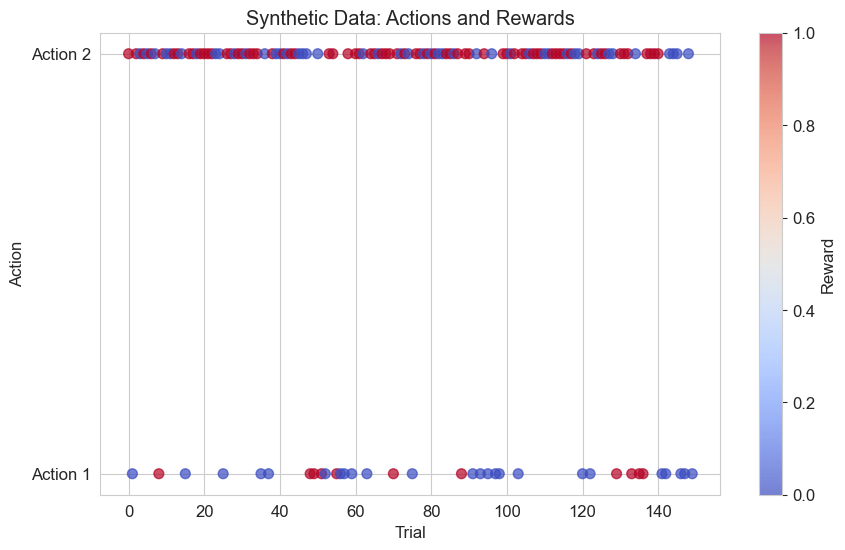

In [89]:
# Generate synthetic data from a Q-learning agent
np.random.seed(123)
true_alpha = 0.15
true_temperature = 0.3
reward_probs = [0.4, 0.6]  # Slightly more subtle difference
n_trials = 150

# Generate data
true_actions, true_rewards, _ = q_learning_bandit(n_trials, true_alpha, true_temperature, reward_probs)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(range(n_trials), true_actions, c=true_rewards, cmap='coolwarm', alpha=0.7, s=50)
plt.colorbar(label='Reward')
plt.title('Synthetic Data: Actions and Rewards')
plt.xlabel('Trial')
plt.ylabel('Action')
plt.yticks([0, 1], ['Action 1', 'Action 2'])
plt.grid(True)
plt.show()

### 5.2 Model Fitting

Now, let's fit the Q-learning model to this synthetic data to recover the parameters:

In [90]:
def emotion_dynamics(alpha, baseline, external_events, noise_level, initial_state, duration, dt=0.1):
    """Simulate emotion dynamics using a simple dynamical model.
    
    Parameters:
    -----------
    alpha : float
        Rate of return to baseline
    baseline : float
        Baseline emotional state
    external_events : list of tuples
        Each tuple contains (time, magnitude, duration) of an external event
    noise_level : float
        Standard deviation of random fluctuations
    initial_state : float
        Initial emotional state
    duration : float
        Total duration to simulate
    dt : float
        Time step for simulation
        
    Returns:
    --------
    times : array
        Time points
    states : array
        Emotional states at each time point
    events : array
        External influence at each time point
    """
    # Initialize
    times = np.arange(0, duration, dt)
    n_steps = len(times)
    states = np.zeros(n_steps)
    events = np.zeros(n_steps)
    states[0] = initial_state
    
    # Add external events
    for event_time, magnitude, event_duration in external_events:
        event_start = int(event_time / dt)
        event_end = int((event_time + event_duration) / dt)
        if event_end >= n_steps:
            event_end = n_steps - 1
        events[event_start:event_end] = magnitude
    
    # Simulate the dynamics
    for i in range(1, n_steps):
        # Calculate the change in emotional state
        homeostasis = -alpha * (states[i-1] - baseline)  # Return to baseline
        external = events[i-1]  # External influence
        noise = noise_level * np.random.normal()  # Random fluctuations
        
        # Update the state
        delta_x = (homeostasis + external + noise) * dt
        states[i] = states[i-1] + delta_x
    
    return times, states, events

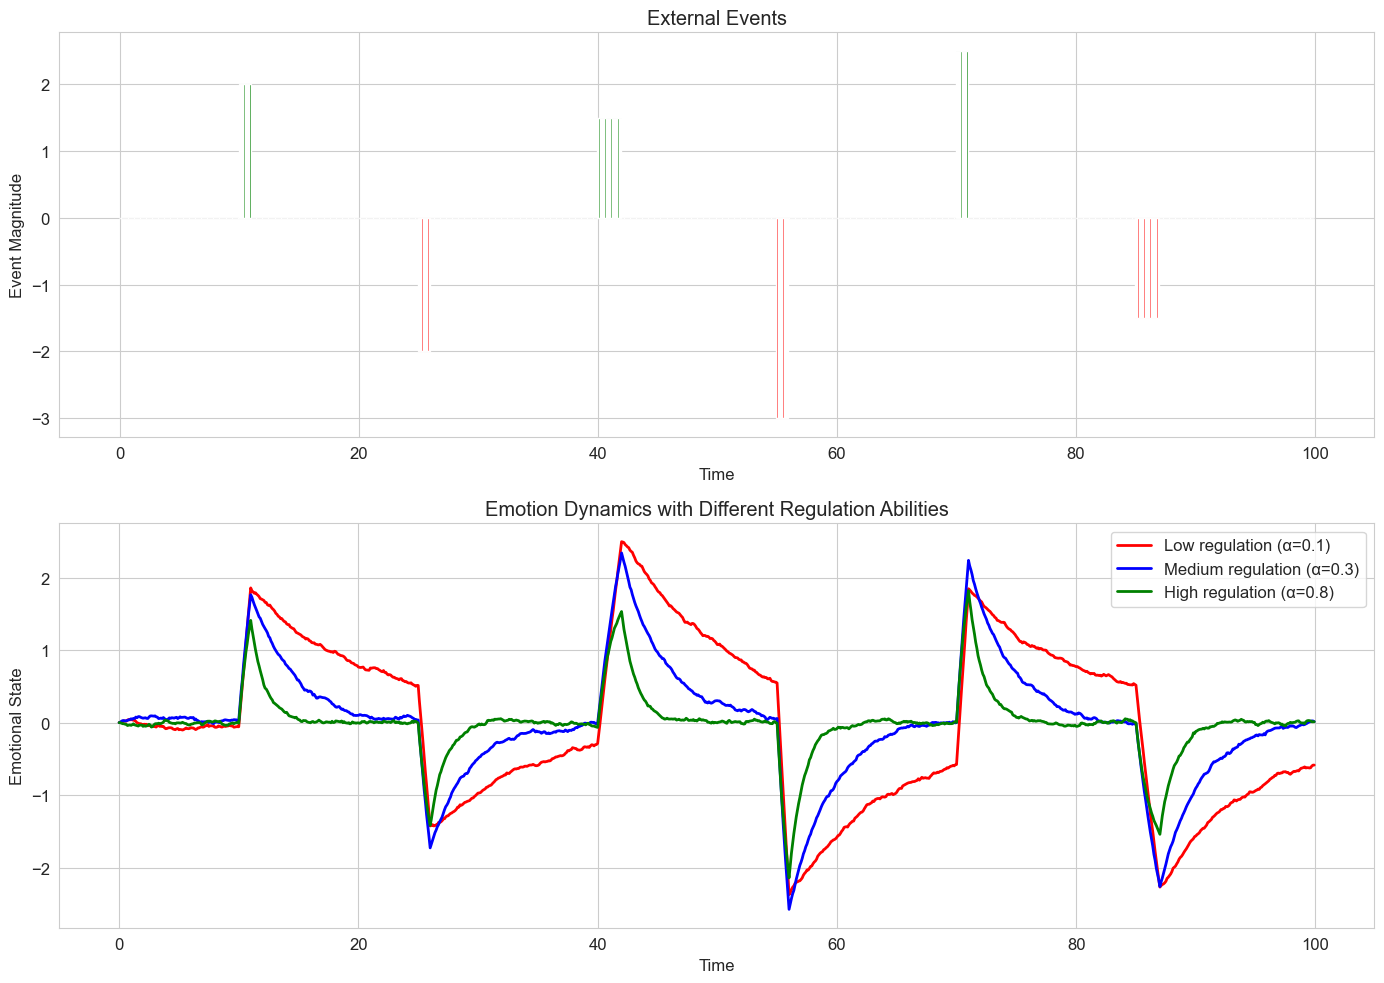

In [91]:
# Simulate emotion dynamics with different parameters
np.random.seed(42)
duration = 100  # Time units (e.g., days)
dt = 0.1

# Define some external events (time, magnitude, duration)
positive_events = [(10, 2.0, 1), (40, 1.5, 2), (70, 2.5, 1)]  # Positive events
negative_events = [(25, -2.0, 1), (55, -3.0, 1), (85, -1.5, 2)]  # Negative events
all_events = positive_events + negative_events

# Simulate for different regulation abilities (alpha values)
alphas = [0.1, 0.3, 0.8]  # Low, medium, high regulation
labels = ['Low regulation', 'Medium regulation', 'High regulation']
colors = ['red', 'blue', 'green']

plt.figure(figsize=(14, 10))

# Plot the external events
plt.subplot(2, 1, 1)
times = np.arange(0, duration, dt)
events_timeline = np.zeros_like(times)
for event_time, magnitude, event_duration in all_events:
    event_start = int(event_time / dt)
    event_end = int((event_time + event_duration) / dt)
    if event_end >= len(times):
        event_end = len(times) - 1
    events_timeline[event_start:event_end] = magnitude

plt.bar(times, events_timeline, width=dt, color=['green' if e > 0 else 'red' for e in events_timeline])
plt.title('External Events')
plt.xlabel('Time')
plt.ylabel('Event Magnitude')

# Plot the emotional states for different regulation abilities
plt.subplot(2, 1, 2)
for alpha, label, color in zip(alphas, labels, colors):
    times, states, _ = emotion_dynamics(
        alpha=alpha,
        baseline=0,
        external_events=all_events,
        noise_level=0.1,
        initial_state=0,
        duration=duration,
        dt=dt
    )
    plt.plot(times, states, label=f'{label} (α={alpha})', color=color, linewidth=2)

plt.title('Emotion Dynamics with Different Regulation Abilities')
plt.xlabel('Time')
plt.ylabel('Emotional State')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

This emotion dynamics model demonstrates several important principles:

1. **Homeostasis**: Emotions tend to return to a baseline state over time
2. **Individual Differences**: People differ in their emotion regulation abilities (represented by α)
3. **External Influences**: Events can temporarily push emotions away from baseline
4. **Stochasticity**: Emotions fluctuate randomly even in the absence of external events

This type of model can be used to study various aspects of emotional functioning, including emotion regulation, emotional reactivity, and emotional recovery from significant life events.

### 3.2 Coupled Oscillators: Modeling Interpersonal Dynamics

Interpersonal dynamics, such as the emotional states of two people in a relationship, can be modeled using coupled oscillators. Each person's emotional state influences the other's, creating complex patterns of interaction.

A simple model of coupled emotional oscillators can be described by the following system of differential equations:

$$\frac{dx_1}{dt} = -\alpha_1(x_1 - b_1) + c_{12}(x_2 - x_1) + \sigma_1\eta_1(t)$$
$$\frac{dx_2}{dt} = -\alpha_2(x_2 - b_2) + c_{21}(x_1 - x_2) + \sigma_2\eta_2(t)$$

Where:
- $x_1$ and $x_2$ are the emotional states of the two individuals
- $b_1$ and $b_2$ are their baseline states
- $\alpha_1$ and $\alpha_2$ are their rates of return to baseline
- $c_{12}$ and $c_{21}$ are the coupling strengths (how much each person influences the other)
- $\sigma_1\eta_1(t)$ and $\sigma_2\eta_2(t)$ represent random fluctuations

Let's implement this model:

In [92]:
def coupled_emotions(alphas, baselines, coupling, noise_levels, initial_states, duration, dt=0.1):
    """Simulate coupled emotion dynamics between two individuals.
    
    Parameters:
    -----------
    alphas : tuple of floats
        Rates of return to baseline for each individual
    baselines : tuple of floats
        Baseline emotional states for each individual
    coupling : tuple of floats
        Coupling strengths (how much each person influences the other)
    noise_levels : tuple of floats
        Standard deviations of random fluctuations for each individual
    initial_states : tuple of floats
        Initial emotional states for each individual
    duration : float
        Total duration to simulate
    dt : float
        Time step for simulation
        
    Returns:
    --------
    times : array
        Time points
    states1 : array
        Emotional states of individual 1 at each time point
    states2 : array
        Emotional states of individual 2 at each time point
    """
    # Unpack parameters
    alpha1, alpha2 = alphas
    b1, b2 = baselines
    c12, c21 = coupling
    sigma1, sigma2 = noise_levels
    x1_0, x2_0 = initial_states
    
    # Initialize
    times = np.arange(0, duration, dt)
    n_steps = len(times)
    states1 = np.zeros(n_steps)
    states2 = np.zeros(n_steps)
    states1[0] = x1_0
    states2[0] = x2_0
    
    # Simulate the dynamics
    for i in range(1, n_steps):
        # Calculate changes for individual 1
        homeostasis1 = -alpha1 * (states1[i-1] - b1)
        coupling1 = c12 * (states2[i-1] - states1[i-1])
        noise1 = sigma1 * np.random.normal()
        delta_x1 = (homeostasis1 + coupling1 + noise1) * dt
        
        # Calculate changes for individual 2
        homeostasis2 = -alpha2 * (states2[i-1] - b2)
        coupling2 = c21 * (states1[i-1] - states2[i-1])
        noise2 = sigma2 * np.random.normal()
        delta_x2 = (homeostasis2 + coupling2 + noise2) * dt
        
        # Update states
        states1[i] = states1[i-1] + delta_x1
        states2[i] = states2[i-1] + delta_x2
    
    return times, states1, states2

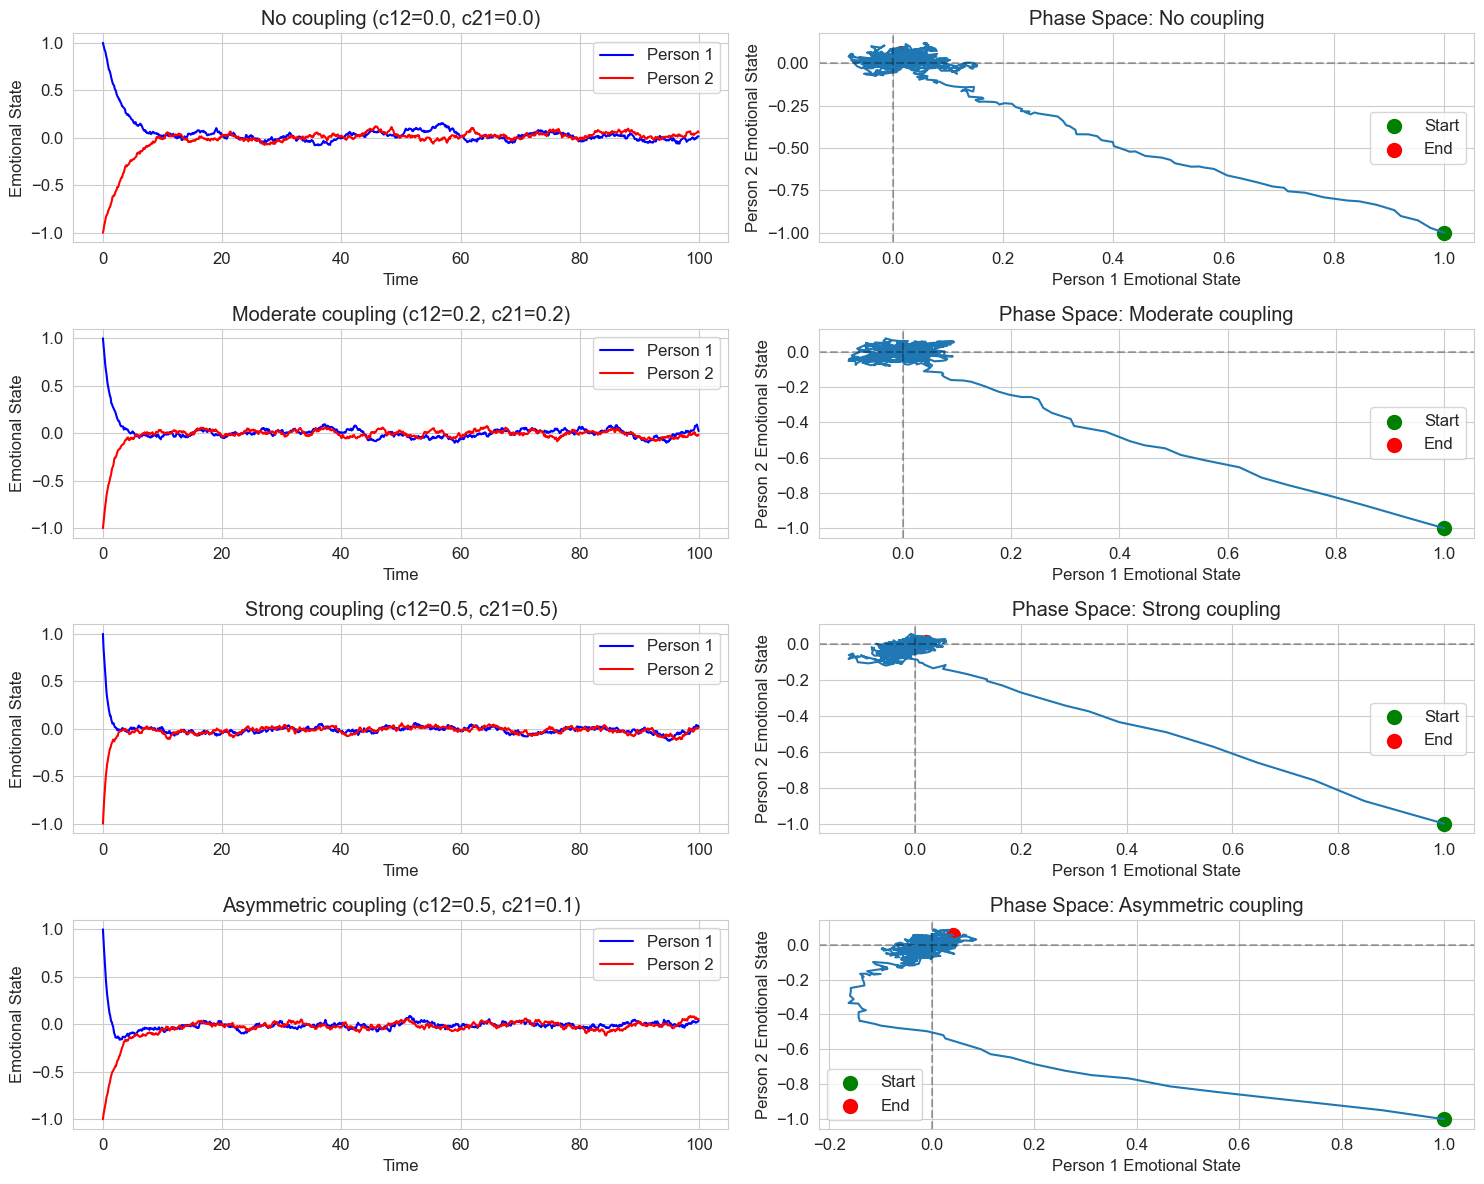

In [93]:
# Simulate coupled emotion dynamics with different coupling strengths
np.random.seed(42)
duration = 100
dt = 0.1

# Fixed parameters
alphas = (0.3, 0.3)  # Same regulation ability
baselines = (0, 0)  # Same baseline
noise_levels = (0.1, 0.1)  # Same noise level
initial_states = (1.0, -1.0)  # Start in opposite states

# Different coupling strengths
coupling_scenarios = [
    (0.0, 0.0),  # No coupling
    (0.2, 0.2),  # Moderate symmetric coupling
    (0.5, 0.5),  # Strong symmetric coupling
    (0.5, 0.1)   # Asymmetric coupling (person 1 influences person 2 more)
]
labels = ['No coupling', 'Moderate coupling', 'Strong coupling', 'Asymmetric coupling']

plt.figure(figsize=(15, 12))

for i, (coupling, label) in enumerate(zip(coupling_scenarios, labels)):
    times, states1, states2 = coupled_emotions(
        alphas=alphas,
        baselines=baselines,
        coupling=coupling,
        noise_levels=noise_levels,
        initial_states=initial_states,
        duration=duration,
        dt=dt
    )
    
    # Plot time series
    plt.subplot(4, 2, 2*i+1)
    plt.plot(times, states1, label='Person 1', color='blue')
    plt.plot(times, states2, label='Person 2', color='red')
    plt.title(f'{label} (c12={coupling[0]}, c21={coupling[1]})')
    plt.xlabel('Time')
    plt.ylabel('Emotional State')
    plt.legend()
    plt.grid(True)
    
    # Plot phase space
    plt.subplot(4, 2, 2*i+2)
    plt.plot(states1, states2)
    plt.scatter(states1[0], states2[0], color='green', s=100, label='Start')
    plt.scatter(states1[-1], states2[-1], color='red', s=100, label='End')
    plt.title(f'Phase Space: {label}')
    plt.xlabel('Person 1 Emotional State')
    plt.ylabel('Person 2 Emotional State')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

This coupled oscillator model demonstrates several important principles of interpersonal dynamics:

1. **Synchronization**: With strong coupling, the emotional states of the two individuals tend to synchronize over time
2. **Emotional Contagion**: One person's emotions can influence another's, leading to emotional convergence
3. **Asymmetric Influence**: In some relationships, one person may have more influence over the other's emotional state
4. **Emergent Patterns**: Complex patterns of interaction can emerge from relatively simple coupling mechanisms

These types of models have been used to study various interpersonal phenomena, including emotional contagion, co-regulation in couples, and parent-child interactions.

## 4. Reinforcement Learning Models

Reinforcement learning (RL) is a computational framework for understanding how agents learn to make decisions through interaction with an environment. RL models have been widely used in psychology to explain how humans and animals learn from rewards and punishments.

### 4.1 Q-Learning: A Basic RL Algorithm

Q-learning is a simple but powerful RL algorithm that learns the value of actions in different states. The core update equation is:

$$Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]$$

Where:
- $Q(s, a)$ is the value of taking action $a$ in state $s$
- $\alpha$ is the learning rate
- $r$ is the reward received
- $\gamma$ is the discount factor for future rewards
- $s'$ is the next state
- $\max_{a'} Q(s', a')$ is the maximum value possible in the next state

Let's implement a simple Q-learning model for a two-armed bandit task, where an agent must choose between two options with different reward probabilities:

In [94]:
def q_learning_bandit(alpha, beta, n_trials, reward_probs):
    """Simulate Q-learning in a multi-armed bandit task.
    
    Parameters:
    -----------
    alpha : float
        Learning rate (0-1)
    beta : float
        Inverse temperature parameter for softmax action selection
    n_trials : int
        Number of trials to simulate
    reward_probs : list of floats
        Reward probabilities for each arm
        
    Returns:
    --------
    choices : array
        Choices made on each trial
    rewards : array
        Rewards received on each trial
    q_values : array
        Q-values for each arm over time
    """
    n_arms = len(reward_probs)
    
    # Initialize arrays to store results
    choices = np.zeros(n_trials, dtype=int)
    rewards = np.zeros(n_trials)
    q_values = np.zeros((n_trials + 1, n_arms))
    
    # Initialize Q-values to zero
    q_values[0] = np.zeros(n_arms)
    
    for t in range(n_trials):
        # Compute action probabilities using softmax
        exp_values = np.exp(beta * q_values[t])
        probs = exp_values / np.sum(exp_values)
        
        # Choose an action
        action = np.random.choice(n_arms, p=probs)
        choices[t] = action
        
        # Get reward
        reward = 1 if np.random.random() < reward_probs[action] else 0
        rewards[t] = reward
        
        # Update Q-value for the chosen action
        q_values[t+1] = q_values[t].copy()
        q_values[t+1, action] += alpha * (reward - q_values[t, action])
    
    return choices, rewards, q_values

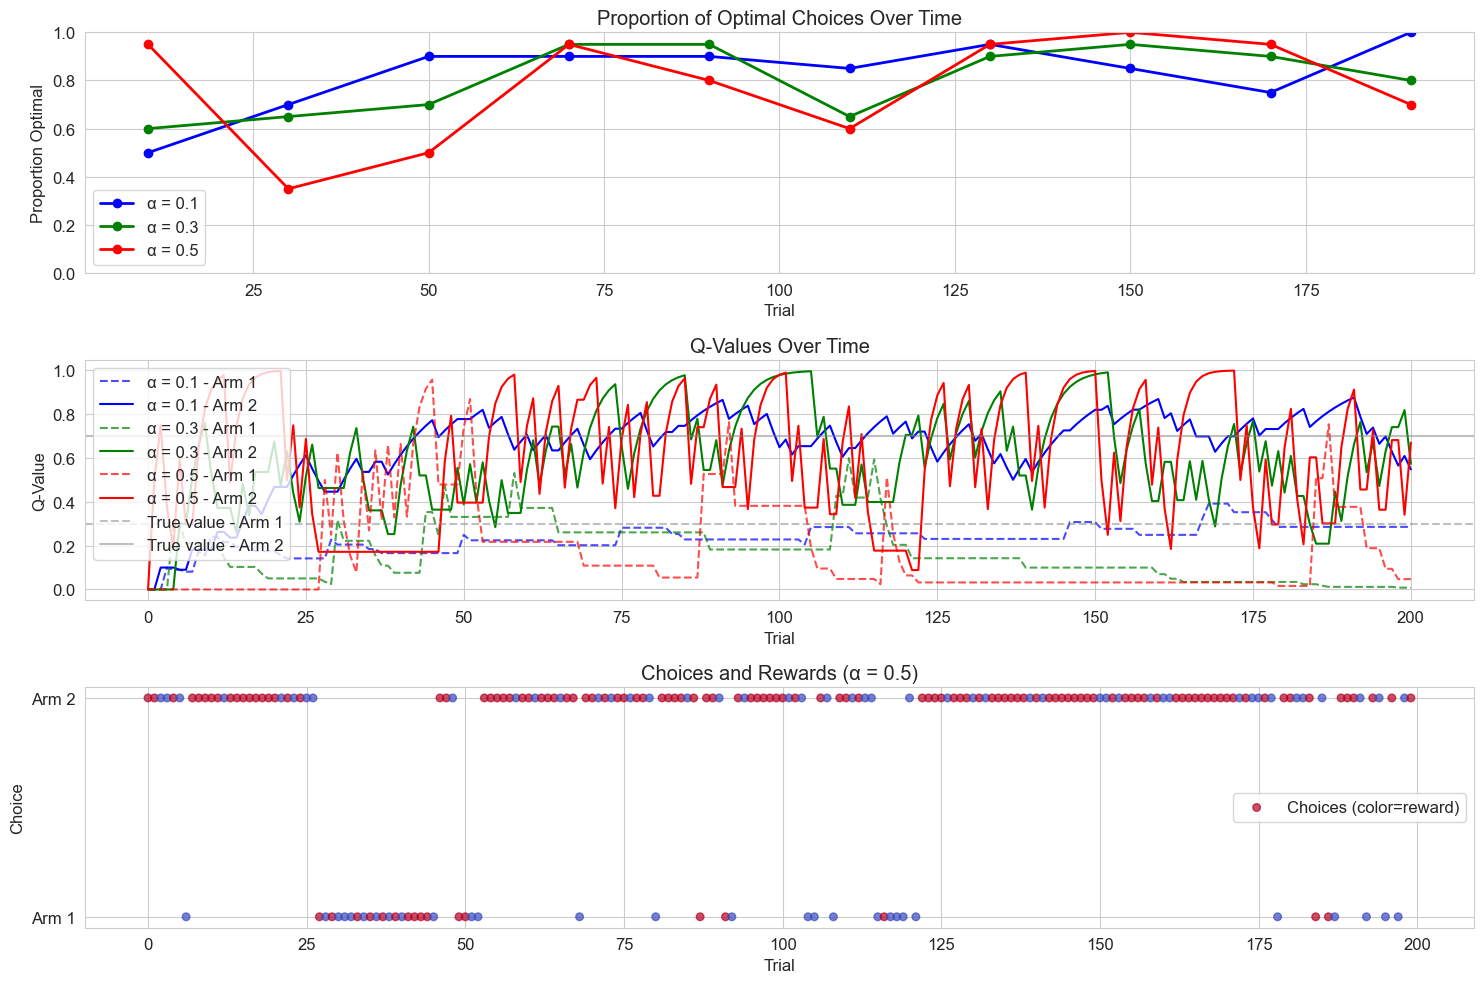

In [95]:
# Simulate Q-learning with different learning rates
np.random.seed(42)
n_trials = 200
reward_probs = [0.3, 0.7]  # Arm 1: 30% reward, Arm 2: 70% reward
beta = 5.0  # Inverse temperature (higher = more exploitative)

# Different learning rates
alphas = [0.1, 0.3, 0.5]
labels = [f'α = {alpha}' for alpha in alphas]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(15, 10))

for i, (alpha, label, color) in enumerate(zip(alphas, labels, colors)):
    choices, rewards, q_values = q_learning_bandit(alpha, beta, n_trials, reward_probs)
    
    # Calculate proportion of optimal choices in bins
    bin_size = 20
    n_bins = n_trials // bin_size
    optimal_choice = np.argmax(reward_probs)
    optimal_proportions = np.zeros(n_bins)
    
    for b in range(n_bins):
        start = b * bin_size
        end = (b + 1) * bin_size
        optimal_proportions[b] = np.mean(choices[start:end] == optimal_choice)
    
    # Plot proportion of optimal choices
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(bin_size/2, n_trials, bin_size), optimal_proportions, 'o-', 
             label=label, color=color, linewidth=2)
    
    # Plot Q-values over time
    plt.subplot(3, 1, 2)
    plt.plot(q_values[:, 0], '--', color=color, alpha=0.7, label=f'{label} - Arm 1')
    plt.plot(q_values[:, 1], '-', color=color, label=f'{label} - Arm 2')
    
    # Plot example choices for the last learning rate
    if i == len(alphas) - 1:
        plt.subplot(3, 1, 3)
        plt.scatter(np.arange(n_trials), choices, c=rewards, cmap='coolwarm', 
                    alpha=0.7, s=30, label='Choices (color=reward)')
        plt.yticks([0, 1], ['Arm 1', 'Arm 2'])
        plt.title(f'Choices and Rewards ({label})')
        plt.xlabel('Trial')
        plt.ylabel('Choice')
        plt.legend()

# Add titles and labels
plt.subplot(3, 1, 1)
plt.title('Proportion of Optimal Choices Over Time')
plt.xlabel('Trial')
plt.ylabel('Proportion Optimal')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.title('Q-Values Over Time')
plt.xlabel('Trial')
plt.ylabel('Q-Value')
plt.axhline(y=reward_probs[0], color='gray', linestyle='--', alpha=0.5, label='True value - Arm 1')
plt.axhline(y=reward_probs[1], color='gray', linestyle='-', alpha=0.5, label='True value - Arm 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The Q-learning model demonstrates several important principles of reinforcement learning:

1. **Value Learning**: The agent learns the expected value of each action through trial and error
2. **Exploration-Exploitation Tradeoff**: The agent must balance exploring new options and exploiting known good options
3. **Learning Rate Effects**: Higher learning rates lead to faster adaptation but more sensitivity to noise
4. **Convergence**: With sufficient experience, the learned values converge to the true expected rewards

This type of model has been used to explain various aspects of human and animal learning, including how people learn to make choices in uncertain environments and how this learning is affected by factors such as dopamine, which is thought to signal reward prediction errors.

### 4.2 Temporal Difference Learning

Temporal Difference (TD) learning extends Q-learning to handle sequences of states and delayed rewards. The TD learning update equation is:

$$V(s) \leftarrow V(s) + \alpha [r + \gamma V(s') - V(s)]$$

Where $V(s)$ is the value of state $s$.

Let's implement a TD learning model for a simple sequential decision task:

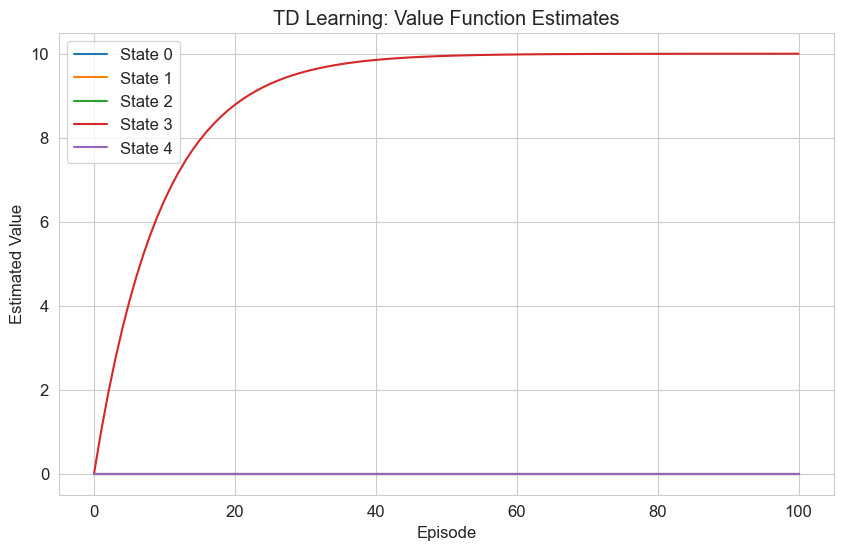

In [96]:
def td_learning(alpha, gamma, n_episodes, n_states, transition_probs, rewards):
    """Simulate TD learning in a Markov Decision Process.
    
    Parameters:
    -----------
    alpha : float
        Learning rate (0-1)
    gamma : float
        Discount factor (0-1)
    n_episodes : int
        Number of episodes to simulate
    n_states : int
        Number of states in the environment
    transition_probs : list of lists
        Transition probabilities between states
    rewards : list
        Rewards for each state
        
    Returns:
    --------
    value_history : array
        Value estimates for each state over episodes
    """
    # Initialize value function
    value_history = np.zeros((n_episodes + 1, n_states))
    
    for episode in range(n_episodes):
        # Start in state 0
        state = 0
        
        # Simulate until reaching the terminal state
        while state < n_states - 1:  # Last state is terminal
            # Choose next state based on transition probabilities
            next_state = np.random.choice(n_states, p=transition_probs[state])
            
            # Get reward for the transition
            reward = rewards[next_state]
            
            # TD update
            value_history[episode+1, state] = value_history[episode, state] + \
                alpha * (reward + gamma * value_history[episode, next_state] - value_history[episode, state])
            
            # For states we didn't visit in this episode, copy values from previous episode
            unvisited_states = np.arange(n_states) != state
            value_history[episode+1, unvisited_states] = value_history[episode, unvisited_states]
            
            # Move to the next state
            state = next_state
    
    return value_history

n_states = 5
transition_probs = [
[0, 0.8, 0.2, 0, 0],  # State 0 transitions
[0, 0, 0.6, 0.4, 0],  # State 1 transitions
[0, 0.3, 0, 0.7, 0],  # State 2 transitions
[0, 0, 0.5, 0, 0.5],  # State 3 transitions
[0, 0, 0, 0, 1.0]     # State 4 (terminal) stays in place
]

# Define rewards for each state
rewards = [0, 0, 0, 0, 10]  # Only terminal state has reward

# Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
n_episodes = 100

# Run TD learning
value_history = td_learning(alpha, gamma, n_episodes, n_states, transition_probs, rewards)

# Plot the evolution of value estimates
plt.figure(figsize=(10, 6))
for state in range(n_states):
    plt.plot(value_history[:, state], label=f'State {state}')

plt.xlabel('Episode')
plt.ylabel('Estimated Value')
plt.title('TD Learning: Value Function Estimates')
plt.legend()
plt.grid(True)
plt.show()

The plot shows how the value estimates for each state evolve over episodes. Notice how the values propagate backward from the terminal state with the reward. States closer to the reward develop higher values earlier, while more distant states take longer to develop accurate value estimates.

### 4.2 Q-Learning: Action-Value Learning

While TD learning estimates the value of states, Q-learning estimates the value of state-action pairs. This allows the agent to learn optimal actions in each state. The Q-learning update rule is:

$$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)]$$

Let's implement Q-learning for a simple grid world environment:

In [97]:
def q_learning(alpha, gamma, epsilon, n_episodes, n_states, n_actions, transition_func, reward_func):
    """Simulate Q-learning in a simple environment.
    
    Parameters:
    -----------
    alpha : float
        Learning rate (0-1)
    gamma : float
        Discount factor (0-1)
    epsilon : float
        Exploration rate (0-1)
    n_episodes : int
        Number of episodes to simulate
    n_states : int
        Number of states in the environment
    n_actions : int
        Number of possible actions
    transition_func : function
        Function that takes (state, action) and returns next_state
    reward_func : function
        Function that takes (state, action, next_state) and returns reward
        
    Returns:
    --------
    q_values : array
        Final Q-values for each state-action pair
    reward_history : array
        Total reward per episode
    """
    # Initialize Q-values
    q_values = np.zeros((n_states, n_actions))
    reward_history = np.zeros(n_episodes)
    
    for episode in range(n_episodes):
        # Start in a random non-terminal state
        state = np.random.randint(0, n_states - 1)
        total_reward = 0
        done = False
        
        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                # Explore: choose random action
                action = np.random.randint(0, n_actions)
            else:
                # Exploit: choose best action (with random tie-breaking)
                best_actions = np.where(q_values[state] == np.max(q_values[state]))[0]
                action = np.random.choice(best_actions)
            
            # Take action and observe next state and reward
            next_state = transition_func(state, action)
            reward = reward_func(state, action, next_state)
            total_reward += reward
            
            # Check if next state is terminal
            if next_state == n_states - 1:
                done = True
            
            # Q-learning update
            best_next_value = np.max(q_values[next_state])
            q_values[state, action] += alpha * (reward + gamma * best_next_value - q_values[state, action])
            
            # Move to next state
            state = next_state
        
        reward_history[episode] = total_reward
    
    return q_values, reward_history

Now lets define a simple grid world environment and apply Q-learning

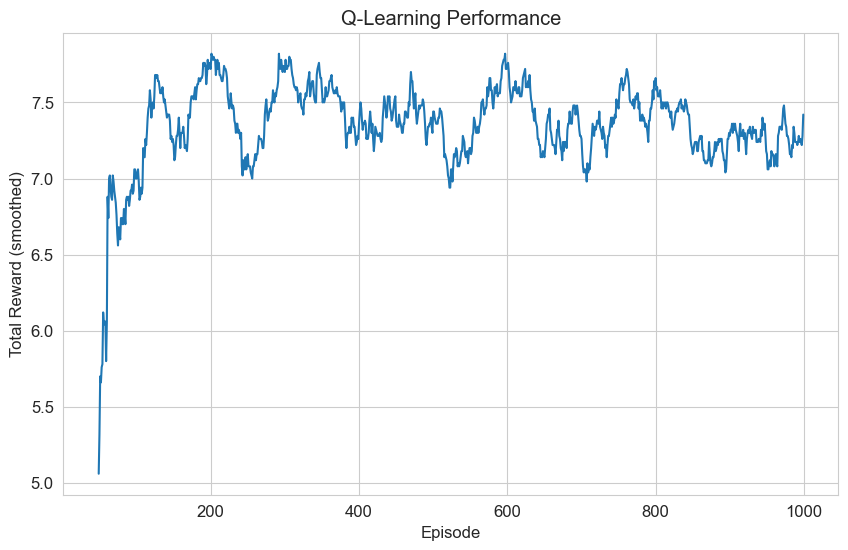

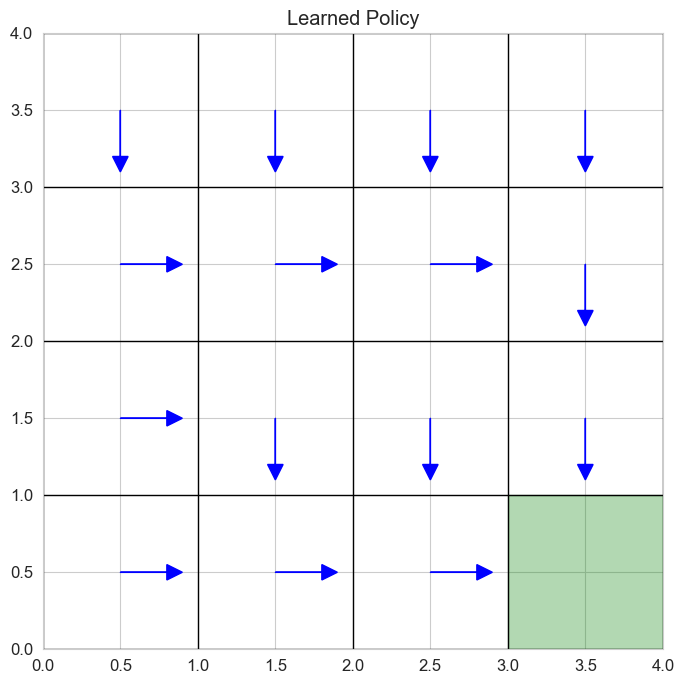

In [98]:
# Define a 4x4 grid world
# States are numbered 0-15, with state 15 as the goal
# Actions: 0=up, 1=right, 2=down, 3=left

def grid_transition(state, action, grid_size=4):
    """Determine next state given current state and action."""
    # Convert state to grid coordinates
    row, col = state // grid_size, state % grid_size
    
    # Apply action
    if action == 0:  # Up
        row = max(0, row - 1)
    elif action == 1:  # Right
        col = min(grid_size - 1, col + 1)
    elif action == 2:  # Down
        row = min(grid_size - 1, row + 1)
    elif action == 3:  # Left
        col = max(0, col - 1)
    
    # Convert back to state number
    next_state = row * grid_size + col
    return next_state

def grid_reward(state, action, next_state, grid_size=4):
    """Determine reward for a transition."""
    # Goal state
    if next_state == grid_size**2 - 1:
        return 10
    # Penalty for each step to encourage efficiency
    return -1

# Run Q-learning
alpha = 0.1
gamma = 0.9
epsilon = 0.1
n_episodes = 1000
n_states = 16
n_actions = 4

q_values, reward_history = q_learning(
    alpha, gamma, epsilon, n_episodes, n_states, n_actions,
    lambda s, a: grid_transition(s, a),
    lambda s, a, ns: grid_reward(s, a, ns)
)

# Plot learning curve
plt.figure(figsize=(10, 6))
# Smooth the reward history with a moving average
window_size = 50
smoothed_rewards = np.convolve(reward_history, np.ones(window_size)/window_size, mode='valid')
episodes = np.arange(len(smoothed_rewards)) + window_size - 1

plt.plot(episodes, smoothed_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward (smoothed)')
plt.title('Q-Learning Performance')
plt.grid(True)
plt.show()

# Visualize the learned policy
def plot_policy(q_values, grid_size=4):
    """Visualize the policy derived from Q-values."""
    policy = np.argmax(q_values, axis=1)
    
    # Create a grid to visualize the policy
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    
    # Draw grid lines
    for i in range(grid_size + 1):
        ax.axhline(i, color='black', linewidth=1)
        ax.axvline(i, color='black', linewidth=1)
    
    # Draw arrows for policy
    for state in range(grid_size**2):
        if state == grid_size**2 - 1:  # Skip goal state
            continue
        
        row, col = state // grid_size, state % grid_size
        action = policy[state]
        
        # Arrow directions
        if action == 0:  # Up
            dx, dy = 0, 0.3
        elif action == 1:  # Right
            dx, dy = 0.3, 0
        elif action == 2:  # Down
            dx, dy = 0, -0.3
        elif action == 3:  # Left
            dx, dy = -0.3, 0
        
        ax.arrow(col + 0.5, grid_size - row - 0.5, dx, dy, 
                 head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    
    # Mark goal state
    goal_row, goal_col = (grid_size**2 - 1) // grid_size, (grid_size**2 - 1) % grid_size
    ax.add_patch(plt.Rectangle((goal_col, grid_size - goal_row - 1), 1, 1, color='green', alpha=0.3))
    
    plt.title('Learned Policy')
    plt.show()

plot_policy(q_values)

### 4.3 Model-Based vs. Model-Free Learning
Reinforcement learning algorithms can be categorized as model-based or model-free:

- Model-free learning (like Q-learning) learns directly from experience without building an explicit model of the environment.
- Model-based learning builds an internal model of the environment (transition and reward functions) and uses it for planning.
Let's implement a simple model-based learning algorithm:

In [99]:
def model_based_learning(n_episodes, n_states, n_actions, transition_func, reward_func):
    """Simulate model-based learning in a simple environment.
    
    Parameters:
    -----------
    n_episodes : int
        Number of episodes to simulate
    n_states : int
        Number of states in the environment
    n_actions : int
        Number of possible actions
    transition_func : function
        True transition function (state, action) -> next_state
    reward_func : function
        True reward function (state, action, next_state) -> reward
        
    Returns:
    --------
    value_function : array
        Final value function for each state
    policy : array
        Final policy (action for each state)
    """
    # Initialize model (transition and reward estimates)
    # For each state-action pair, track observed next states and rewards
    transition_counts = np.zeros((n_states, n_actions, n_states))
    reward_sum = np.zeros((n_states, n_actions, n_states))
    reward_counts = np.zeros((n_states, n_actions, n_states))
    
    # Initialize value function and policy
    value_function = np.zeros(n_states)
    policy = np.zeros(n_states, dtype=int)
    
    # Discount factor
    gamma = 0.9
    
    for episode in range(n_episodes):
        # Start in a random non-terminal state
        state = np.random.randint(0, n_states - 1)
        done = False
        
        # Collect experience
        while not done:
            # Choose random action for exploration
            action = np.random.randint(0, n_actions)
            
            # Take action and observe next state and reward
            next_state = transition_func(state, action)
            reward = reward_func(state, action, next_state)
            
            # Update model
            transition_counts[state, action, next_state] += 1
            reward_sum[state, action, next_state] += reward
            reward_counts[state, action, next_state] += 1
            
            # Check if next state is terminal
            if next_state == n_states - 1:
                done = True
            
            # Move to next state
            state = next_state
        
        # Update value function and policy using the model (value iteration)
        for _ in range(10):  # Number of planning steps
            delta = 0
            for s in range(n_states):
                old_value = value_function[s]
                
                # Skip terminal state
                if s == n_states - 1:
                    continue
                
                # Compute action values using the model
                action_values = np.zeros(n_actions)
                for a in range(n_actions):
                    # For each possible next state
                    for ns in range(n_states):
                        # Skip if transition never observed
                        if transition_counts[s, a, ns] == 0:
                            continue
                        
                        # Probability of transition
                        prob = transition_counts[s, a, ns] / np.sum(transition_counts[s, a])
                        
                        # Average reward
                        avg_reward = reward_sum[s, a, ns] / reward_counts[s, a, ns]
                        
                        # Update action value
                        action_values[a] += prob * (avg_reward + gamma * value_function[ns])
                
                # Update value function and policy
                value_function[s] = np.max(action_values)
                policy[s] = np.argmax(action_values)
                
                # Track maximum change
                delta = max(delta, abs(old_value - value_function[s]))
            
            # Early stopping if value function converges
            if delta < 0.01:
                break
    
    return value_function, policy

Let's compare model-based and model-free learning:

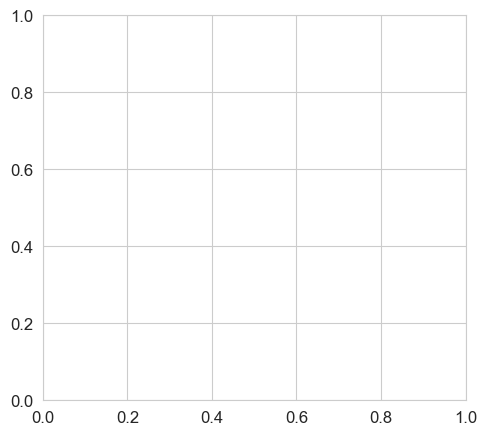

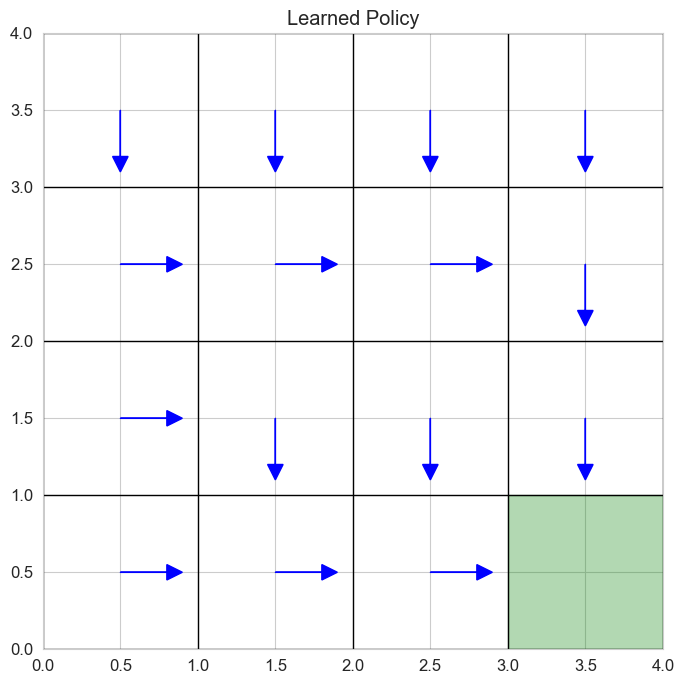

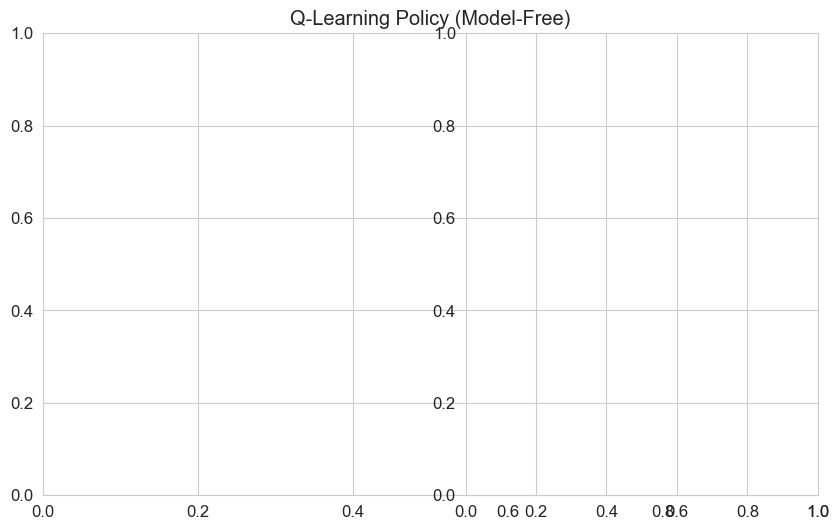

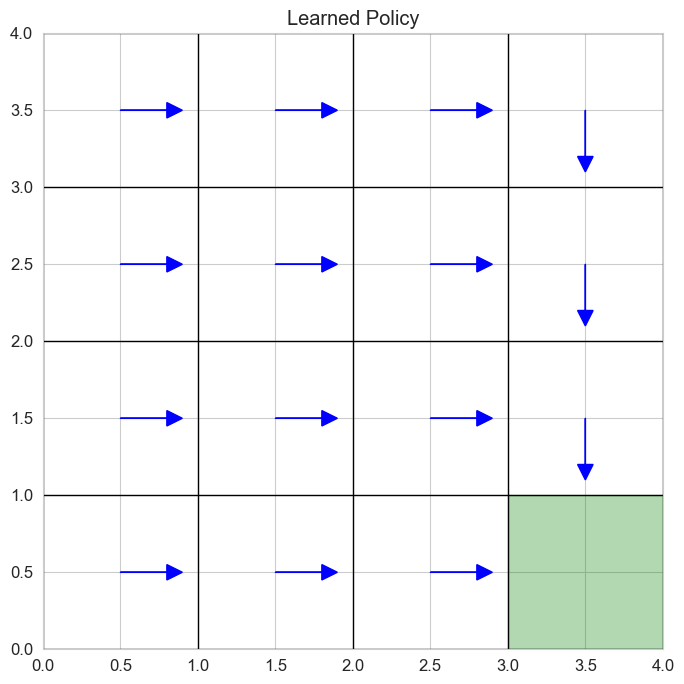

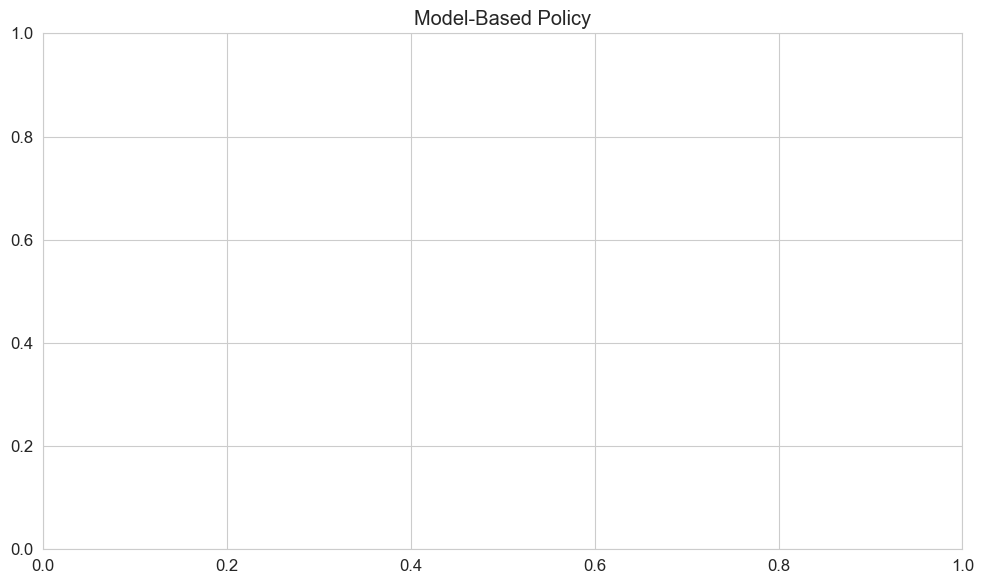

In [100]:
# Run model-based learning
n_episodes = 100
value_function, policy = model_based_learning(
    n_episodes, n_states, n_actions,
    lambda s, a: grid_transition(s, a),
    lambda s, a, ns: grid_reward(s, a, ns)
)

# Visualize the model-based policy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_policy(q_values)
plt.title('Q-Learning Policy (Model-Free)')

plt.subplot(1, 2, 2)
# Convert policy to Q-values format for visualization
mb_q_values = np.zeros((n_states, n_actions))
for s in range(n_states):
    mb_q_values[s, policy[s]] = 1
plot_policy(mb_q_values)
plt.title('Model-Based Policy')

plt.tight_layout()
plt.show()

## 5. Bayesian Models of Cognition
Bayesian models provide a framework for understanding how humans combine prior knowledge with new evidence to update their beliefs. The core of Bayesian modeling is Bayes' theorem:

$$P(h|d) = \frac{P(d|h) \cdot P(h)}{P(d)}$$

Where:

- $P(h|d)$ is the posterior probability of hypothesis $h$ given data $d$
- $P(d|h)$ is the likelihood of observing data $d$ under hypothesis $h$
- $P(h)$ is the prior probability of hypothesis $h$
- $P(d)$ is the marginal probability of data $d$
### 5.1 Bayesian Inference in Perception
Let's implement a simple Bayesian model of perception, where an observer tries to infer the true size of an object based on noisy visual input and prior knowledge:

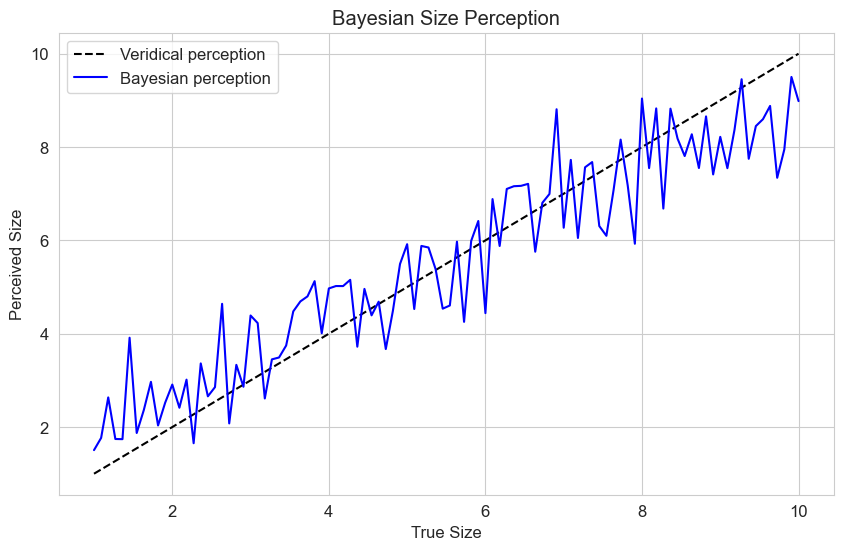

In [101]:
def bayesian_size_perception(true_sizes, noise_level, prior_mean, prior_std, n_samples=1000):
    """Simulate Bayesian inference in size perception.
    
    Parameters:
    -----------
    true_sizes : array
        True sizes of objects
    noise_level : float
        Standard deviation of perceptual noise
    prior_mean : float
        Mean of the prior distribution
    prior_std : float
        Standard deviation of the prior distribution
    n_samples : int
        Number of samples for Monte Carlo approximation
        
    Returns:
    --------
    perceived_sizes : array
        Perceived sizes after Bayesian inference
    """
    perceived_sizes = []
    
    for true_size in true_sizes:
        # Generate noisy measurement
        measurement = true_size + np.random.normal(0, noise_level)
        
        # Generate samples from the prior
        prior_samples = np.random.normal(prior_mean, prior_std, n_samples)
        
        # Calculate likelihood for each sample
        likelihoods = np.exp(-0.5 * ((measurement - prior_samples) / noise_level)**2)
        
        # Weight samples by likelihood (importance sampling)
        weights = likelihoods / np.sum(likelihoods)
        
        # Calculate weighted mean (posterior mean)
        perceived_size = np.sum(weights * prior_samples)
        perceived_sizes.append(perceived_size)
    
    return np.array(perceived_sizes)

# Demonstrate size perception
true_sizes = np.linspace(1, 10, 100)
noise_level = 1.0
prior_mean = 5.0
prior_std = 2.0

perceived_sizes = bayesian_size_perception(true_sizes, noise_level, prior_mean, prior_std)

plt.figure(figsize=(10, 6))
plt.plot(true_sizes, true_sizes, 'k--', label='Veridical perception')
plt.plot(true_sizes, perceived_sizes, 'b-', label='Bayesian perception')
plt.xlabel('True Size')
plt.ylabel('Perceived Size')
plt.title('Bayesian Size Perception')
plt.legend()
plt.grid(True)
plt.show()

### 5.2 Bayesian Decision Theory
Bayesian decision theory extends Bayesian inference to decision making by incorporating utilities or loss functions. Let's implement a simple model of decision making under uncertainty:

In [102]:
def bayesian_decision(prior_probs, likelihoods, utilities):
    """Compute optimal decisions using Bayesian decision theory.
    
    Parameters:
    -----------
    prior_probs : array
        Prior probabilities of states
    likelihoods : array
        Likelihood of evidence given each state
    utilities : array
        Utility matrix [actions, states]
        
    Returns:
    --------
    posterior_probs : array
        Posterior probabilities of states
    expected_utilities : array
        Expected utility of each action
    optimal_action : int
        Action with highest expected utility
    """
    # Calculate posterior probabilities
    unnormalized_posterior = prior_probs * likelihoods
    posterior_probs = unnormalized_posterior / np.sum(unnormalized_posterior)
    
    # Calculate expected utility for each action
    expected_utilities = np.dot(utilities, posterior_probs)
    
    # Choose action with highest expected utility
    optimal_action = np.argmax(expected_utilities)
    
    return posterior_probs, expected_utilities, optimal_action

# Example: Medical diagnosis decision
# States: Disease present (0) or absent (1)
prior_probs = np.array([0.1, 0.9])  # 10% base rate of disease

# Likelihoods of test result given disease state
# P(positive|disease), P(positive|no disease)
likelihoods = np.array([0.9, 0.2])  # 90% sensitivity, 80% specificity

# Utilities for each action (treat or don't treat) in each state
# [treat if disease, treat if no disease]
# [don't treat if disease, don't treat if no disease]
utilities = np.array([
    [10, -5],   # Treating: benefit if disease, cost if no disease
    [-20, 0]    # Not treating: severe cost if disease, no effect if no disease
])

posterior, expected_utils, optimal_action = bayesian_decision(prior_probs, likelihoods, utilities)

print(f"Posterior probability of disease: {posterior[0]:.3f}")
print(f"Expected utilities: Treat = {expected_utils[0]:.2f}, Don't treat = {expected_utils[1]:.2f}")
print(f"Optimal action: {'Treat' if optimal_action == 0 else 'Do not treat'}")


Posterior probability of disease: 0.333
Expected utilities: Treat = -0.00, Don't treat = -6.67
Optimal action: Treat


## 6. Neural Network Models
Neural networks are powerful computational models inspired by the brain's structure. They've been used to model various cognitive processes, from perception to language.

### 6.1 Simple Neural Network for Categorization
Let's implement a simple neural network to model how humans learn to categorize stimuli:

Training accuracy: 0.85
Test accuracy: 0.87


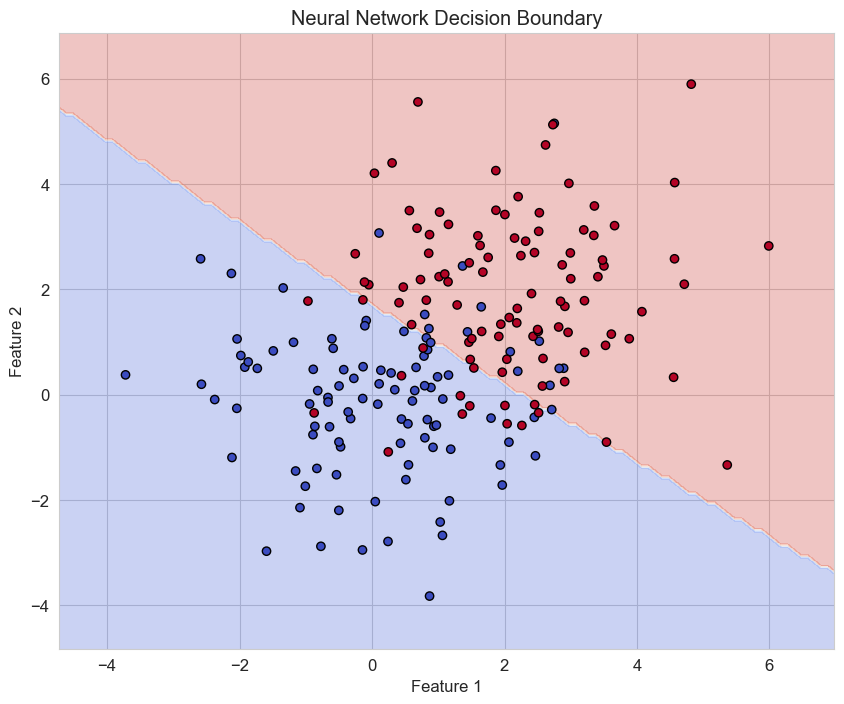

In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def generate_category_data(n_samples=200, noise_level=0.5):
    """Generate artificial category data with two features and two categories."""
    # Category A: cluster around (0, 0)
    n_a = n_samples // 2
    X_a = np.random.normal(0, 1, (n_a, 2)) + np.array([0, 0])
    y_a = np.zeros(n_a)
    
    # Category B: cluster around (2, 2)
    n_b = n_samples - n_a
    X_b = np.random.normal(0, 1, (n_b, 2)) + np.array([2, 2])
    y_b = np.ones(n_b)
    
    # Combine data
    X = np.vstack([X_a, X_b])
    y = np.hstack([y_a, y_b])
    
    # Add noise to make task harder
    X += np.random.normal(0, noise_level, X.shape)
    
    return X, y

# Generate data
X, y = generate_category_data(noise_level=1.0)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train neural network
model = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', 
                     max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

# Visualize decision boundary
def plot_decision_boundary(model, X, y, scaler):
    """Plot the decision boundary of a classifier."""
    # Set up grid
    h = 0.1  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Scale grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(grid_points)
    
    # Predict class for each grid point
    Z = model.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y, scaler)

### 6.2 Recurrent Neural Networks for Sequential Processing
Recurrent Neural Networks (RNNs) are particularly useful for modeling sequential processes like language or memory:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

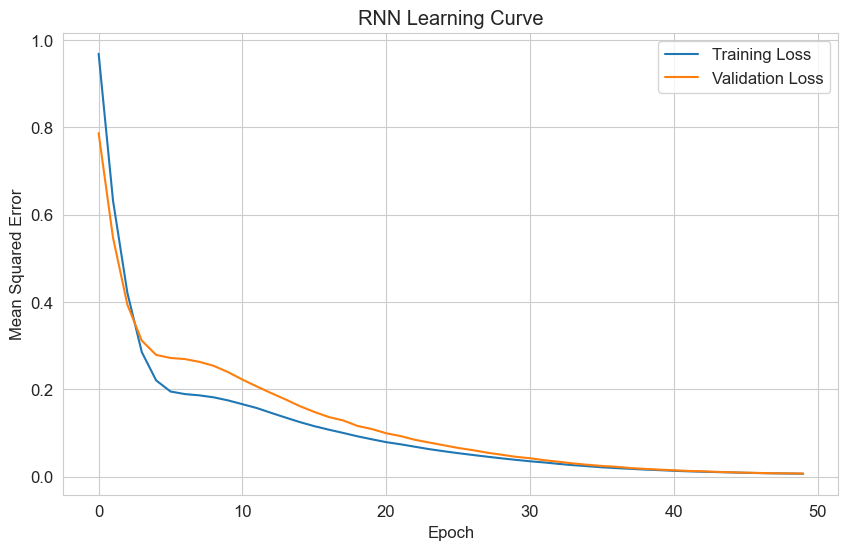

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


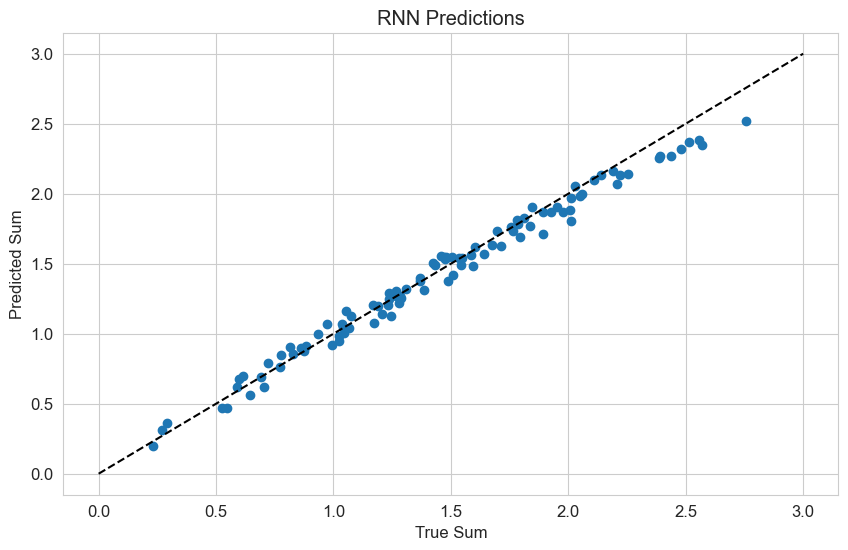

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate sequence prediction data
def generate_sequence_data(n_sequences=100, seq_length=10):
    """Generate sequences where the target is the sum of the last 3 elements."""
    X = np.random.uniform(0, 1, (n_sequences, seq_length, 1))
    y = np.zeros((n_sequences, 1))
    
    for i in range(n_sequences):
        # Target is sum of last 3 elements
        y[i, 0] = np.sum(X[i, -3:, 0])
    
    return X, y

# Generate data
X, y = generate_sequence_data(n_sequences=500, seq_length=10)
X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]

# Build RNN model
model = Sequential([
    SimpleRNN(10, input_shape=(10, 1), activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('RNN Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Test predictions
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 3], [0, 3], 'k--')
plt.xlabel('True Sum')
plt.ylabel('Predicted Sum')
plt.title('RNN Predictions')
plt.grid(True)
plt.show()

## 7. Agent-Based Models
Agent-based models simulate interactions between multiple individuals (agents) to study emergent social phenomena.

### 7.1 Schelling Segregation Model
The Schelling model demonstrates how individual preferences can lead to segregation patterns:

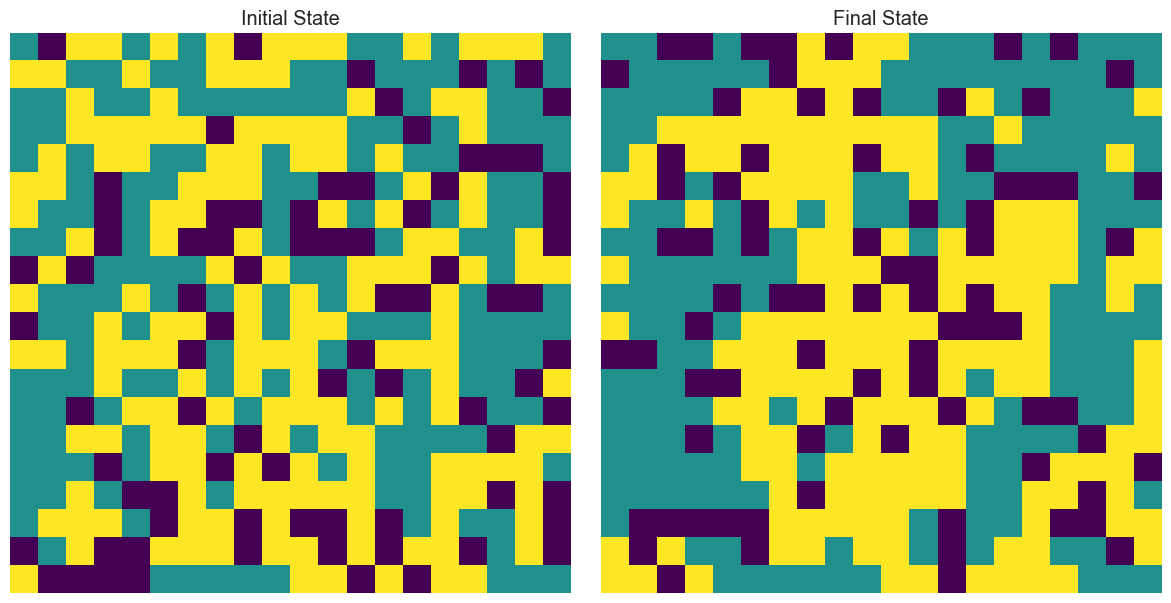

In [105]:
def schelling_model(grid_size=50, n_iterations=100, empty_ratio=0.2, similarity_threshold=0.3, n_types=2):
    """Simulate Schelling's segregation model.
    
    Parameters:
    -----------
    grid_size : int
        Size of the grid (grid_size x grid_size)
    n_iterations : int
        Number of iterations to run
    empty_ratio : float
        Proportion of cells that are empty
    similarity_threshold : float
        Minimum ratio of similar neighbors for an agent to be satisfied
    n_types : int
        Number of different agent types
        
    Returns:
    --------
    grid_history : list
        Grid state at each iteration
    """
    # Initialize grid
    grid = np.zeros((grid_size, grid_size), dtype=int)
    
    # Fill grid with agents
    n_empty = int(grid_size * grid_size * empty_ratio)
    n_agents = grid_size * grid_size - n_empty
    
    agent_types = np.random.randint(1, n_types + 1, n_agents)
    
    # Randomly place agents
    agent_positions = np.random.choice(grid_size * grid_size, n_agents, replace=False)
    for i, pos in enumerate(agent_positions):
        row, col = pos // grid_size, pos % grid_size
        grid[row, col] = agent_types[i]
    
    grid_history = [grid.copy()]
    
    # Run simulation
    for _ in range(n_iterations):
        # Shuffle agent positions for random processing order
        np.random.shuffle(agent_positions)
        
        for pos in agent_positions:
            row, col = pos // grid_size, pos % grid_size
            agent_type = grid[row, col]
            
            if agent_type == 0:  # Skip empty cells
                continue
            
            # Check neighbors
            neighbors = []
            for i in range(max(0, row-1), min(grid_size, row+2)):
                for j in range(max(0, col-1), min(grid_size, col+2)):
                    if i == row and j == col:
                        continue
                    neighbors.append(grid[i, j])
            
            # Calculate similarity ratio
            n_neighbors = len(neighbors)
            n_similar = sum(1 for n in neighbors if n == agent_type)
            n_occupied = sum(1 for n in neighbors if n > 0)
            
            # If no occupied neighbors, agent is satisfied
            if n_occupied == 0:
                continue
            
            similarity_ratio = n_similar / n_occupied
            
            # If agent is unsatisfied, move to random empty cell
            if similarity_ratio < similarity_threshold:
                # Find empty cells
                empty_cells = np.where(grid == 0)
                empty_indices = list(zip(empty_cells[0], empty_cells[1]))
                
                if empty_indices:
                    # Choose random empty cell
                    new_row, new_col = random.choice(empty_indices)
                    
                    # Move agent
                    grid[new_row, new_col] = agent_type
                    grid[row, col] = 0
        
        grid_history.append(grid.copy())
    
    return grid_history

# Run Schelling model
import random
np.random.seed(42)
random.seed(42)

grid_history = schelling_model(grid_size=20, n_iterations=50, similarity_threshold=0.4)

# Visualize initial and final states
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grid_history[0], cmap='viridis')
plt.title('Initial State')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grid_history[-1], cmap='viridis')
plt.title('Final State')
plt.axis('off')

plt.tight_layout()
plt.show()

# Create animation
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(grid_history[0], cmap='viridis')
ax.set_title('Schelling Segregation Model')
ax.axis('off')

def update(frame):
    im.set_array(grid_history[frame])
    return [im]

ani = FuncAnimation(fig, update, frames=len(grid_history), interval=200, blit=True)
plt.close()  # Prevent duplicate display
# Display animation in notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

## 8. Conclusion
Computational modeling provides a powerful approach for formalizing and testing psychological theories. In this chapter, we've explored several modeling frameworks:

1. Reinforcement Learning Models help us understand how humans and animals learn from rewards and punishments
2. Bayesian Models formalize how prior knowledge influences perception and decision-making
3. Neural Network Models simulate brain-like information processing
4. Agent-Based Models capture emergent phenomena in social systems
Each modeling approach has its strengths and limitations, and the choice of model depends on the specific psychological phenomenon being studied. By implementing these models computationally, we can generate precise predictions that can be tested against empirical data.

As computational power continues to increase, psychological models are becoming increasingly sophisticated, allowing researchers to simulate complex cognitive processes with greater fidelity. This convergence of psychology and computational science represents an exciting frontier for advancing our understanding of the human mind.

## 9. Exercises
1. Modify the TD learning algorithm to implement SARSA, another popular reinforcement learning algorithm.
2. Extend the Bayesian perception model to account for multiple sensory cues (e.g., vision and touch).
3. Implement a simple connectionist model of semantic memory using a neural network.
4. Create an agent-based model of social influence where agents update their opinions based on their neighbors.
5. Design and implement a computational model of a psychological phenomenon of your choice.